In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-02-20 18:07:14,718 : INFO : 'pattern' package not found; tag filters are not available for English
/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



3.1.0


In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id  \
2791  6691   
2107  5794   
1537  3549   
3479  7665   
1956  5589   
3206  7288   
3007  6992   
1469  3469   
3027  7052   
656   1134   

                                                                            title  \
2791  Staff Dialogue Systems Engineer (702855)                                      
2107  Cloud Engineer 2                                                              
1537  Data and Machine Learning Software Engineer                                   
3479  Senior Research Analyst, IRDS &amp; IE                                        
1956  Cloud Support Associate - Big Data                                            
3206  Director of Data Science                                                      
3007  Sr. Software Development Engineer - Web Services                              
1469  Medicaid Fraud Control Unit - Research Analyst NYC (Ref# MFCU_RSA_NYC_6087)   
3027  Physician - Pulmonologist                                                     
656   Senior Data Scientist                                                         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])

This took under 10 seconds to run.

In [24]:
X.sample(25)

id  \
379   713    
365   696    
2789  6689   
2804  6713   
2962  6940   
3631  7839   
3087  7142   
1302  3238   
295   584    
636   1108   
1217  3118   
452   819    
3132  7198   
3591  7798   
1454  3450   
3385  7557   
412   761    
2041  5709   
2353  6095   
1811  5194   
2121  5811   
1645  4511   
1688  4565   
1884  5491   
3559  7763   

                                                                                       title  \
379   Data Scientist                                                                           
365   Back End Engineer | Noodle.com                                                           
2789  Principal Engineer, Algorithms Voice Interfaces ( Tech Lead)                             
2804  Machine Learning Engineer                                                                
2962  Senior Software Engineer                                                                 
3631  Data Science Intern (Telematics)                                                         
3087  Quantitative Research Analyst                                                            
1302  Data Scientist                                                                           
295   Technical Program Manager                                                                
636   Senior Data Scientist                                                                    
1217  Machine Learning Engineer                                                                
452   Product Marketing Writer                                                                 
3132  Senior Computer Vision Software Engineer (FT)                                            
3591  Machine Learning Engineer                                                                
1454  Data Scientist                                                                           
3385  Data Sciences Intern                                                                     
412   Research Intern                                                                          
2041  Data Scientist - Machine Learning Engineer                                               
2353  Artificial Intelligence Senior Manager                                                   
1811  Senior Technology Leader - Enterprise Search                                             
2121  Senior Developer (Health Informatics)                                                    
1645  Machine Learning Researcher                                                              
1688  Delivery Data Scientist, Diverse Industry Solutions, Data &amp; AI, Microsoft Services   
1884  Data Engineer                                                                            
3559  Computer Systems Engineer                                                                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id  \
3512  7707   
1681  4556   
1771  4979   
1703  4591   
3172  7249   
3558  7762   
1066  2806   
717   1926   
1751  4897   
3076  7130   
3656  7865   
447   811    
3251  7348   
3662  7871   
2729  6612   
1858  5462   
674   1846   
1719  4610   
1012  2681   
2070  5742   
3054  7104   
150   318    
3223  7307   
2330  6072   
1451  3446   

                                                                                    title  \
3512  Data Scientist                                                                        
1681  SENIOR TECHNICAL ARCHITECT                                                            
1771  Senior Financial Analyst                                                              
1703  Data Science Director, Gartner Research and Advisory, Stamford, CT or Arlington, VA   
3172  ML Specialist Solutions Architect                                                     
3558  Deep Learning Computer Architect                                                      
1066  Machine Learning Engineering                                                          
717   Computational Engineer                                                                
1751  Technical Recruiter                                                                   
3076  Analytic Scientist (Scores)                                                           
3656  Partners Data &amp; Analytics Internship, Fall 2019 - Orlando, FL                     
447   Machine Learning Engineer                                                             
3251  PART TIME NON-EXEMPT ASSISTANT RESEARCH SCIENTIST:                                    
3662  Sr. Machine Learning Scientist                                                        
2729  Technical Analyst                                                                     
1858  Data Scientist (Secret Clearance Required)                                            
674   Enterprise Architect - Architecture and Engineering, Full-time, Days                  
1719  Machine Learning Engineer                                                             
1012  Associate, Artificial Intelligence &amp; Machine Learning                             
2070  Infrastructure Consultant 2 - Informatica Administrator                               
3054  Research Software Engineer, Google Brain                                              
150   Siri - EPM Data Infrastructure                                                        
3223  Intelligent Automation Lead                                                           
2330  Data Engineer Technical Lead                                                          
1451  Data Scientist                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id  \
43    125    
1151  2997   
3472  7657   
3129  7195   
1322  3271   
176   360    
2769  6663   
745   1970   
3304  7447   
2278  6011   
3061  7111   
3288  7413   
185   372    
1336  3291   
2162  5857   
794   2042   
3241  7331   
146   307    
2055  5725   
2252  5972   
2233  5946   
753   1980   
1440  3430   
761   1988   
903   2188   

                                                                                                                   title  \
43    Data Scientist                                                                                                       
1151  Machine Learning Researcher                                                                                          
3472  Summer 2019 Software Engineer Intern                                                                                 
3129  MGR DATA SCIENCE AND ANALYTICS                                                                                       
1322  GPU Frameworks Intern                                                                                                
176   Research Scientist                                                                                                   
2769  Prinicpal Data Scientist                                                                                             
745   Signal Processing Engineer                                                                                           
3304  Deep Learning Research Intern                                                                                        
2278  Senior Data Engineer                                                                                                 
3061  Sr. Data Scientist-Healthcare Quality                                                                                
3288  Research Intern - Deep Learning and Natural Language Processing                                                      
185   Data Scientist                                                                                                       
1336  Scientist- Computational Linguistics                                                                                 
2162  GCP/Cloud Engineer                                                                                                   
794   Materials Postdoctoral Scholar                                                                                       
3241  Engineering Internship                                                                                               
146   PROJECT MANAGER, School of Medicine, Anatomy   Neurobiology                                                          
2055  Senior Ruby Consultant                                                                                               
2252  Big Data Engineer                                                                                                    
2233  Senior Data Engineer (Consumer)                                                                                      
753   Postdoctoral Fellowship: Bioprocess Analytics                                                                        
1440  Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning   
761   Senior Analyst (Recruiting)                                                                                          
903   SCIENTIFIC PROGRAMMER, COMPUTATIONAL MEMORY LAB                                                                      

                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id  \
3264  7368   
1342  3298   
687   1880   
1426  3415   
490   869    
658   1136   
3242  7332   
1166  3026   
2756  6645   
2776  6670   
1072  2818   
3626  7834   
2153  5848   
545   980    
2806  6715   
296   585    
225   456    
2905  6873   
1304  3243   
325   635    
911   2197   
1299  3233   
2375  6119   
570   1019   
987   2304   

                                                                                 title  \
3264  Marketing Content Writer – Consultant                                              
1342  Cognitive Software Developer Intern May 2019 12-16 months                          
687   EEG Pruner                                                                         
1426  Research Staff - CISL                                                              
490   Speech Recognition/Understanding Intern                                            
658   Data Scientist                                                                     
3242  Handwriting Recognition Engineer, Frameworks                                       
1166  Data Scientist                                                                     
2756  UC Tech- Nortel                                                                    
2776  Document Control Specialist I                                                      
1072  Full-time opportunities for students   recent graduates: Data   Applied Sciences   
3626  Deep Learning   Neural Networks System Software Engineer                           
2153  Sr. Applied Scientist                                                              
545   Data Scientist, Artificial Intelligence                                            
2806  Data Analyst                                                                       
296   Software Engineering Intern, PhD, Summer 2019                                      
225   AI Insights Analyst                                                                
2905  Senior Voice Network Engineer                                                      
1304  Internship, Anti-Malware Group - Detection Team                                    
325   Search– Digital Product Manager – CIB – VP                                         
911   Senior Software Engineer                                                           
1299  Curation Editor                                                                    
2375  Sr Data Engineer (AWS/Cloud)                                                       
570   Senior Data Scientist / Pre-Sales Support                                          
987   Software Development Engineer - C /Java                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id  \
1376  3349   
1390  3373   
2506  6311   
1777  4997   
770   2003   
1042  2756   
821   2083   
239   489    
856   2131   
2089  5771   
374   706    
3568  7775   
1942  5572   
718   1927   
621   1083   
994   2649   
959   2266   
127   282    
605   1062   
1988  5631   
1929  5554   
3547  7750   
2034  5700   
1727  4782   
2492  6295   

                                                                     title  \
1376  Software Engineering Program Manager, Machine Learning                 
1390  Intern Program                                                         
2506  Technician- Unified Communications                                     
1777  Senior System Engineer                                                 
770   EEG TECHNICIAN                                                         
1042  Machine Learning Engineer                                              
821   Image Processing Engineer                                              
239   Research Interns                                                       
856   Senior Data Scientist Internship - Summer 2019                         
2089  Big Data Engineer                                                      
374   Software Engineer II                                                   
3568  Global Data Science Instructor                                         
1942  Master Software Engineer                                               
718   Senior Director                                                        
621   Data Scientist, Operations   Manufacturing                             
994   Big Data Engineer/Architect - Digital Infrastructure                   
959   Data Scientist - Geospatial Intern/Co−op                               
127   Adjunct Lecturer, Analytics Frameworks   Methods II (ONLINE, Sum'19)   
605   Data Scientist -- Machine Learning / Artif Intel                       
1988  Developer Big Data                                                     
1929  Data Engineer                                                          
3547  Digital Marketing Associate or Intern                                  
2034  Software Engineer                                                      
1727  Software Developer (7732)                                              
2492  Boathouse Supervisor - Key Bridge Boathouse                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
2154  Senior Data Analyst                                                
1385  PWM Technology  Ayco  Analyst Production Response and Monitoring   
3489  Enterprise Data Scientist I                                        
2373  Master Software Engineer Tech Lead                                 
3414  Temporary Research Technician                                      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [45]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [46]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop']))

In [48]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [49]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['ipullrank', 'ambitious', 'digital', 'marketing', 'agency', 'base', 'found', 'industry', 'thought', 'leader', 'michael', 'mission', 'drive', 'result', 'client', 'deliver', 'marketing', 'proud', 'value', 'proud', 'proactive', 'reliable', 'outstanding', 'useful', 'dedicate', 'front', 'center', 'basis', 'curious', 'type', 'client', 'range', 'fortune', 'brand', 'size', 'enterprise', 'excite', 'small', 'business', 'execute', 'consult', 'campaign', 'variety', 'industry', 'client', 'medium', 'finance', 'fashion', 'company', 'ipullrank', 'adept', 'provide', 'range', 'digital', 'marketing', 'services', 'combination', 'content', 'strategy', 'search', 'engine', 'optimization', 'conversion', 'optimization', 'employee', 'encourage', 'specialize', 'deeply', 'specific', 'category', 'passionate', 'round', 'marketer', 'collaboration', 'training', 'world', 'employer', 'cultivate', 'environment', 'employee', 'take', 'despite', 'offer', 'competitive', 'salary', 'benefit', 'employee', 'ownership', 'impact

['internship', 'pandora', 'unique', 'collection', 'engineer', 'musician', 'designer', 'marketer', 'world', 'class', 'sellers', 'common', 'enrich', 'life', 'deliver', 'effortless', 'personalize', 'music', 'enjoyment', 'discovery', 'people', 'listener', 'artist', 'employee', 'center', 'mission', 'everything', 'actually', 'employee', 'pandora', 'service', 'bright', 'eclectic', 'innovative', 'collaboration', 'foundation', 'workforce', 'looking', 'smart', 'individual', 'motivate', 'passionate', 'engine', 'create', 'soundtrack', 'discover', 'future', 'pandora', 'siriusxm', 'pandora', 'join', 'together', 'create', 'world', 'large', 'audio', 'entertainment', 'company', 'together', 'uniquely', 'position', 'audio', 'entertainment', 'deliver', 'compel', 'subscription', 'support', 'audio', 'experience', 'million', 'listener', 'talent', 'content', 'innovation', 'continue', 'forefront', 'check', 'current', 'opening', 'siriusxm', 'career', 'aspect', 'large', 'scale', 'music', 'streaming', 'service', 

['position', 'summary', 'position', 'responsible', 'planning', 'developing', 'executing', 'monitoring', 'testing', 'technique', 'investigative', 'procedure', 'direction', 'principal', 'investigator', 'manager', 'essential', 'duty', 'develop', 'technique', 'investigative', 'procedure', 'include', 'scientific', 'routine', 'computer', 'programming', 'technique', 'reporting', 'technique', 'monitor', 'quality', 'control', 'routine', 'experiment', 'general', 'laboratory', 'activity', 'animal', 'laboratory', 'setting', 'perform', 'laboratory', 'function', 'unique', 'assign', 'laboratory', 'provide', 'general', 'guidance', 'laboratory', 'staff', 'include', 'technician', 'support', 'auxiliary', 'staff', 'leader', 'laboratory', 'program', 'staff', 'assign', 'area', 'demonstrate', 'enhance', 'proficiency', 'preparation', 'glassware', 'extraction', 'plating', 'procedure', 'programming', 'mathematical', 'ordering', 'system', 'prepare', 'statistical', 'tabulation', 'using', 'calculator', 'computer',

['position', 'summary', 'provide', 'technical', 'guidance', 'highly', 'collaborative', 'imaging', 'scientist', 'software', 'developer', 'scientist', 'medicine', 'biology', 'solve', 'image', 'problem', 'field', 'digital', 'pathology', 'manage', 'project', 'working', 'imaging', 'scientist', 'include', 'senior', 'either', 'commercial', 'project', 'initiate', 'direct', 'execute', 'development', 'activity', 'assessment', 'internal', 'project', 'collaboration', 'commercial', 'medical', 'devices', 'make', 'strategic', 'decision', 'provide', 'direction', 'activity', 'field', 'image', 'processing', 'pattern', 'recognition', 'mining', 'essential', 'function', 'serve', 'technical', 'design', 'development', 'innovative', 'algorithm', 'analyze', 'histopathology', 'image', 'design', 'implement', 'algorithm', 'software', 'platform', 'prototyping', 'commercial', 'product', 'development', 'make', 'strategic', 'decision', 'optimize', 'algorithm', 'platform', 'efficiency', 'accuracy', 'performance', 'sca

['commission', 'strong', 'understanding', 'operations', 'system', 'industrial', 'control', 'selling', 'multiple', 'services', 'product', 'combine', 'deliver', 'result', 'development', 'manager', 'maverick', 'technology', 'positive', 'impact', 'growing', 'organization', 'maverick', 'technology', 'currently', 'recruit', 'delivery', 'development', 'manager', 'offer', 'excellent', 'commission', 'structure', 'salary', 'selling', 'services', 'product', 'crucial', 'flexible', 'location', 'successful', 'delivery', 'development', 'manager', 'focus', 'deliver', 'services', 'product', 'qualify', 'candidate', 'demonstrate', 'ability', 'thrive', 'collaborative', 'environment', 'operations', 'sales', 'together', 'execute', 'successful', 'project', 'exceed', 'expectation', 'willing', 'travel', 'need', 'looking', 'eastern', 'midwest', 'western', 'southwest', 'area', 'eastern', 'canada', 'ideal', 'candidate', 'technically', 'savvy', 'understanding', 'operations', 'solution', 'industrial', 'control', 'c

['internship', 'summary', 'vmware', 'recognize', 'today', 'student', 'tomorrow', 'trailblazer', 'value', 'opportunity', 'benefit', 'fresh', 'perspective', 'thrive', 'innovative', 'drive', 'culture', 'vmware', 'could', 'place', 'expose', 'range', 'software', 'platform', 'technology', 'utilize', 'customer', 'world', 'summary', 'vmware', 'global', 'leader', 'cloud', 'infrastructure', 'mobility', 'vmware', 'accelerate', 'customers’', 'digital', 'transformation', 'journey', 'enable', 'enterprise', 'master', 'software', 'define', 'approach', 'vmware', 'solution', 'organization', 'building', 'extraordinary', 'experience', 'mobilize', 'everything', 'customer', 'respond', 'fast', 'opportunity', 'modern', 'host', 'across', 'hybrid', 'cloud', 'safeguard', 'trust', 'defense', 'depth', 'approach', 'cybersecurity', 'people', 'deeply', 'value', 'execution', 'passion', 'integrity', 'customer', 'community', 'stuff', 'always', 'dream', 'explore', 'career', 'vmware', 'vmware', 'offer', 'cutting', 'cloud'

['vanguard', 'center', 'insight', 'seeking', 'engineer', 'desire', 'versatile', 'focus', 'cutting', 'technology', 'provide', 'client', 'immediate', 'impact', 'solution', 'tailor', 'need', 'dynamic', 'researcher', 'engineer', 'scientist', 'collaborate', 'delivery', 'algorithm', 'application', 'looking', 'individual', 'excite', 'expose', 'problem', 'challenge', 'working', 'flexible', 'environment', 'duty', 'responsibility', 'create', 'sophisticate', 'solution', 'problem', 'translate', 'specification', 'design', 'specification', 'ensure', 'develop', 'structure', 'modularized', 'fashion', 'continue', 'discover', 'implement', 'source', 'integration', 'technique', 'beneficial', 'client', 'various', 'tool', 'technique', 'wrangling', 'pipelining', 'heavy', 'focus', 'aspect', 'engineering', 'partner', 'internal', 'client', 'enhance', 'understanding', 'function', 'informational', 'need', 'maintain', 'broad', 'understanding', 'vanguard', 'technology', 'tool', 'application', 'include', 'interface'

['sigma', 'looking', 'scientist', 'variety', 'background', 'propel', 'enhance', 'drive', 'investment', 'initiative', 'sigma', 'scientist', 'explore', 'breadth', 'challenge', 'identify', 'timely', 'unique', 'diving', 'diverse', 'domain', 'visualize', 'explore', 'underlie', 'driver', 'developing', 'feature', 'forecast', 'responsibility', 'apply', 'statistical', 'modeling', 'technique', 'finance', 'intuition', 'datasets', 'large', 'small', 'advance', 'exist', 'initiative', 'opportunity', 'pursue', 'previously', 'unexplored', 'topic', 'across', 'variety', 'industry', 'domain', 'operate', 'extend', 'platform', 'deliver', 'production', 'grade', 'curation', 'services', 'workflow', 'develop', 'domain', 'expertise', 'underlie', 'actor', 'behavior', 'manifest', 'visualize', 'explore', 'enable', 'ideation', 'generation', 'predictive', 'feature', 'qualification', 'advance', 'degree', 'computer', 'prefer', 'years', 'similar', 'apply', 'statistical', 'method', 'distribution', 'classification', 'clus

['summaryjob', 'description', 'senior', 'software', 'engineer', 'timeposition', 'mountain', 'caresponsibilitiesdesign', 'develop', 'backend', 'microservices', 'using', 'technology', 'spring', 'database', 'series', 'database', 'message', 'queue', 'docker', 'scale', 'perform', 'complex', 'processing', 'volume', 'feed', 'large', 'population', 'diverse', 'sensor', 'develop', 'automate', 'test', 'integration', 'test', 'ensure', 'quality', 'defect', 'develop', 'integration', 'party', 'software', 'system', 'position', 'base', 'mountain', 'reporting', 'qualificationsbachelor', 'degree', 'computer', 'relate', 'field', 'masters', 'would', 'plusexperience', 'developing', 'production', 'software', 'consumer', 'facing', 'scale', 'applicationsexperience', 'nosql', 'databasesexperience', 'stream', 'processing', 'technology', 'apache', 'spark', 'apache', 'storm', 'would', 'plus3', 'years', 'software', 'engineeringstrong', 'verbal', 'write', 'communication', 'skillsdomain', 'healthcare', 'biosensors', 

['position', 'summary', 'dietitian', 'responsible', 'consult', 'health', 'worker', 'particular', 'need', 'patient', 'write', 'grant', 'request', 'program', 'analyze', 'content', 'composition', 'manufacture', 'develop', 'specialize', 'diet', 'ensure', 'proper', 'safety', 'regulation', 'address', 'inspect', 'meal', 'serve', 'essential', 'function', 'ass', 'patient', 'health', 'need', 'provide', 'explanation', 'nutrition', 'issue', 'establish', 'proper', 'plan', 'patient', 'accordance', 'preference', 'healthcalculate', 'patient', 'nutritional', 'requirementsanalyze', 'nutritional', 'requirementsevaluate', 'effects', 'plan', 'change', 'plan', 'need', 'promote', 'better', 'nutrition', 'speaking', 'holding', 'services', 'staff', 'nutrition', 'eating', 'habitseducate', 'health', 'professional', 'nutritioneducate', 'client', 'renaissance', 'adult', 'service', 'staff', 'member', 'proper', 'dieting', 'importance', 'disease', 'prevention', 'educate', 'patient', 'nutrition', 'administer', 'medical

['great', 'people', 'great', 'benefit', 'baker', 'assistant', 'ascending', 'level', 'rainy', 'iconic', 'point', 'washington', 'landscape', 'associate', 'valuable', 'meeting', 'guest', 'coworkers', 'around', 'world', 'magical', 'world', 'pristine', 'mountain', 'meadow', 'majestic', 'waterfall', 'peaceful', 'growth', 'forest', 'explore', 'throughout', 'season', 'regularly', 'schedule', 'activity', 'trip', 'transportation', 'provide', 'associate', 'include', 'trip', 'nearby', 'adventure', 'city', 'seattle', 'visit', 'place', 'catch', 'mariner', 'employee', 'vehicle', 'short', 'explore', 'destination', 'portland', 'seattle', 'unique', 'location', 'board', 'provide', 'associate', 'surround', 'community', 'payroll', 'deduction', 'laundry', 'facility', 'provide', 'employee', 'employee', 'meal', 'serve', 'employee', 'dining', 'rooms', 'accommodate', 'limited', 'number', 'unit', 'fully', 'contain', 'camper', 'shell', 'member', 'rainy', 'national', 'expect', 'season', 'approximately', 'early', '

['master', 'degree', 'electrical', 'engineering', 'computer', 'mathematics', 'relate', 'technical', 'field', 'years', 'making', 'individual', 'contribution', 'software', 'development', 'programming', 'language', 'python', 'source', 'technology', 'apache', 'knowledge', 'design', 'common', 'design', 'pattern', 'structure', 'algorithm', 'design', 'problem', 'solving', 'complexity', 'defining', 'architecture', 'explore', 'technical', 'feasibility', 'trade', 'alexa', 'groundbreaking', 'cloud', 'base', 'intelligent', 'agent', 'power', 'devices', 'design', 'around', 'voice', 'mission', 'envelope', 'artificial', 'intelligence', 'natural', 'understanding', 'dialog', 'management', 'automatic', 'speech', 'recognition', 'audio', 'signal', 'processing', 'order', 'provide', 'possible', 'customer', 'looking', 'senior', 'engineer', 'build', 'industry', 'leading', 'conversational', 'technology', 'customer', 'senior', 'engineer', 'alexa', 'responsible', 'translate', 'functional', 'requirement', 'concret

['practice', 'group', 'capgemini', 'expand', 'footprint', 'rapidly', 'fast', 'growing', 'digital', 'practice', 'within', 'capgemini', 'latest', 'advance', 'technology', 'extract', 'meaning', 'value', 'number', 'different', 'industry', 'range', 'medium', 'entertainment', 'science', 'everywhere', 'work', 'geospatial', 'social', 'medium', 'sentiment', 'build', 'recommendation', 'system', 'create', 'image', 'classification', 'algorithm', 'solve', 'large', 'scale', 'optimization', 'problem', 'harness', 'massive', 'influx', 'generate', 'group', 'fast', 'growing', 'digital', 'practice', 'capgemini', 'demand', 'agile', 'innovation', 'group', 'collaborative', 'environment', 'internal', 'client', 'resource', 'understand', 'goal', 'build', 'solution', 'present', 'findings', 'client', 'executive', 'solving', 'world', 'problem', 'passionate', 'solving', 'problem', 'realm', 'cognitive', 'computing', 'utilize', 'acumen', 'statistical', 'understanding', 'technical', 'practice', 'group', 'capgemini', '

['deliver', 'french', 'matter', 'client', 'person', 'always', 'know', 'latest', 'trend', 'passion', 'build', 'product', 'instant', 'deliver', 'change', 'direction', 'clients’', 'critically', 'important', 'decision', 'creativity', 'relationship', 'technical', 'skill', 'improve', 'french', 'product', 'looking', 'member', 'indexing', 'responsible', 'automate', 'classification', 'world', 'important', 'french', 'financial', 'economic', 'entrench', 'bloomberg', 'leader', 'financial', 'market', 'specialize', 'software', 'order', 'create', 'hierarchical', 'rule', 'automatically', 'classify', 'bloomberg', 'third', 'party', 'social', 'medium', 'site', 'interest', 'perform', 'order', 'identify', 'topic', 'relevant', 'french', 'market', 'modify', 'create', 'classification', 'rule', 'accordingly', 'identify', 'opportunity', 'create', 'efficiency', 'process', 'execute', 'idea', 'order', 'build', 'strong', 'local', 'product', 'closely', 'collaborate', 'partner', 'product', 'strategy', 'sales', 'engin

['years', 'messaging', 'change', 'openmessage', 'reimagining', 'interact', 'favorite', 'brand', 'product', 'services', 'limited', 'character', 'count', 'standard', 'message', 'might', 'describe', 'openmessage', 'platform', 'transform', 'mobile', 'messaging', 'smart', 'medium', 'conversation', 'experience', 'openmessage', 'create', 'whole', 'perspective', 'experience', 'commerce', 'booking', 'happen', 'across', 'major', 'messaging', 'channels', 'download', 'require', 'start', 'conversation', 'making', 'mainstream', 'messaging', 'envision', 'design', 'discipline', 'focus', 'making', 'conversational', 'medium', 'experience', 'special', 'currently', 'private', 'release', 'iterate', 'public', 'webapp', 'month', 'january', 'launch', 'accelerate', 'development', 'build', 'product', 'looking', 'talented', 'software', 'engineer', 'build', 'world', 'first', 'mobile', 'messaging', 'framework', 'develop', 'patentable', 'growing', 'incredibly', 'talented', 'requirement', 'computer', 'engineering', 

['objective', 'collaborate', 'senior', 'staff', 'individual', 'department', 'develop', 'understanding', 'needsresearch', 'develop', 'innovative', 'model', 'analysiscommunicate', 'findings', 'idea', 'stakeholder', 'decision', 'makersenable', 'smart', 'process', 'implement', 'meaningful', 'insightskeep', 'current', 'technical', 'industry', 'developmentsresponsibilities', 'strategist', 'identify', 'integrating', 'datasets', 'leverage', 'product', 'capability', 'closely', 'management', 'quality', 'assurance', 'team', 'strategize', 'execute', 'development', 'productsexecute', 'analytical', 'experiment', 'methodically', 'solve', 'various', 'problem', 'impact', 'across', 'various', 'domain', 'industriesidentify', 'relevant', 'source', 'client', 'need', 'collect', 'large', 'structure', 'unstructured', 'datasets', 'variablesdevise', 'utilize', 'algorithm', 'model', 'store', 'perform', 'error', 'improve', 'model', 'clean', 'validate', 'uniformity', 'accuracyanalyze', 'trend', 'pattern', 'interpr

['times', 'company', 'commit', 'produce', 'world', 'reliable', 'high', 'quality', 'journalism', 'ability', 'rely', 'talented', 'expert', 'technologist', 'learn', 'tremendous', 'abundance', 'unique', 'company', 'times', 'seek', 'scientist', 'group', 'apply', 'method', 'challenge', 'close', 'collaboration', 'working', 'partner', 'across', 'company', 'responsibility', 'reframe', 'newsroom', 'objective', 'task', 'deliver', 'actionable', 'insight', 'accurate', 'prediction', 'effective', 'optimization', 'implement', 'execute', 'reliability', 'reproducibility', 'communicate', 'result', 'impact', 'newsroom', 'stakeholder', 'model', 'product', 'collaborate', 'engineering', 'team', 'integrate', 'process', 'throughout', 'times', 'qualification', 'technical', 'years', 'computer', 'apply', 'mathematics', 'quantitative', 'computational', 'discipline', 'minimum', 'years', 'source', 'statistical', 'tool', 'familiarity', 'experimental', 'design', 'minimum', 'years', 'coding', 'python', 'prefer', 'build

['organization', 'corporate', 'function', 'location', 'atlanta', 'boston', 'chicago', 'accenture', 'leading', 'global', 'professional', 'services', 'company', 'provide', 'broad', 'range', 'services', 'solution', 'strategy', 'consult', 'digital', 'operations', 'combining', 'unmatched', 'specialize', 'skill', 'across', 'industry', 'function', 'underpin', 'world', 'large', 'delivery', 'network', 'accenture', 'works', 'intersection', 'client', 'improve', 'performance', 'create', 'sustainable', 'value', 'stakeholder', 'people', 'serving', 'client', 'country', 'accenture', 'drive', 'innovation', 'improve', 'world', 'works', 'life', 'visit', 'accenture', 'people', 'corporate', 'function', 'career', 'track', 'contribute', 'running', 'accenture', 'performance', 'specialization', 'within', 'specific', 'functional', 'internally', 'focus', 'role', 'deepening', 'skill', 'developing', 'skill', 'within', 'internal', 'functional', 'professional', 'posse', 'expertise', 'shaping', 'insight', 'enable', '

['mandatory', 'skill', 'apache', 'spark', 'desirable', 'skill', 'apache', 'cassandra', 'database', 'apache', 'kafka', 'description', 'skill', 'require', 'apache', 'spark', 'mandatory', 'apache', 'cassandra', 'database', 'apache', 'kafka', 'senior', 'developer', 'responsible', 'development', 'support', 'maintenance', 'implementation', 'complex', 'project', 'module', 'application', 'standard', 'software', 'development', 'principle', 'independent', 'member', 'capable', 'apply', 'judgment', 'execute', 'task', 'depth', 'knowledge', 'least', 'development', 'programming', 'respond', 'technical', 'query', 'request', 'member', 'customer', 'coach', 'guide', 'mentor', 'junior', 'member', 'minimum', 'years', 'role', 'responsibility', 'minimum', 'require', 'years', 'mandatory', 'skill', 'apache', 'spark', 'management', 'desirable', 'skill', 'apache', 'cassandra', 'database', 'apache', 'kafka', 'skill', 'english']
['description', 'position', 'summary', 'develop', 'enhance', 'debug', 'support', 'main

['company', 'placeiq', 'leading', 'provider', 'power', 'critical', 'marketing', 'decision', 'location', 'insight', 'early', 'industry', 'pioneer', 'placeiq', 'become', 'standard', 'fueling', 'better', 'decision', 'marketer', 'analyst', 'publisher', 'powerful', 'location', 'base', 'consumer', 'insight', 'world', 'measurement', 'attribution', 'placeiq', 'company', 'uncover', 'opportunity', 'within', 'consumer', 'journey', 'connect', 'location', 'base', 'audience', 'measuring', 'world', 'apply', 'insight', 'drive', 'intelligent', 'marketing', 'successful', 'outcome', 'engineering', 'organization', 'already', 'assemble', 'exceptionally', 'skilled', 'passionate', 'developer', 'scientist', 'looking', 'world', 'class', 'engineer', 'location', 'understanding', 'frontier', 'connect', 'world', 'behavior', 'building', 'regression', 'model', 'classification', 'algorithm', 'visualization', 'spatial', 'clustering', 'within', 'location', 'platform', 'process', 'terabyte', 'daily', 'generate', 'fundam

['position', 'summary', 'dietitian', 'responsible', 'consult', 'health', 'worker', 'particular', 'need', 'patient', 'write', 'grant', 'request', 'program', 'analyze', 'content', 'composition', 'manufacture', 'develop', 'specialize', 'diet', 'ensure', 'proper', 'safety', 'regulation', 'address', 'inspect', 'meal', 'serve', 'essential', 'function', 'ass', 'patient', 'health', 'need', 'provide', 'explanation', 'nutrition', 'issue', 'establish', 'proper', 'plan', 'patient', 'accordance', 'preference', 'healthcalculate', 'patient', 'nutritional', 'requirementsanalyze', 'nutritional', 'requirementsevaluate', 'effects', 'plan', 'change', 'plan', 'need', 'promote', 'better', 'nutrition', 'speaking', 'holding', 'services', 'staff', 'nutrition', 'eating', 'habitseducate', 'health', 'professional', 'nutritioneducate', 'client', 'renaissance', 'adult', 'service', 'staff', 'member', 'proper', 'dieting', 'importance', 'disease', 'prevention', 'educate', 'patient', 'nutrition', 'administer', 'medical

['senior', 'scientist', 'veritone', 'develop', 'proprietary', 'platform', 'unlock', 'power', 'base', 'cognitive', 'computing', 'unstructured', 'audio', 'video', 'process', 'transform', 'analyze', 'seamless', 'automate', 'manner', 'generate', 'actionable', 'intelligence', 'cloud', 'base', 'platform', 'integrate', 'ecosystem', 'variety', 'breed', 'cognitive', 'engine', 'orchestrate', 'together', 'reveal', 'valuable', 'multivariate', 'insight', 'amount', 'audio', 'video', 'found', 'veritone', 'recognize', 'industry', 'prestigious', 'forum', 'include', 'herring', 'award', 'edison', 'award', 'codie', 'award', 'native', 'advertising', 'platform', 'service', 'immediate', 'talented', 'scientist', 'least', 'years', 'professional', 'quickly', 'growing', 'vision', 'leader', 'worldwide', 'looking', 'ambitious', 'scientist', 'works', 'extremely', 'innovative', 'pace', 'environment', 'capable', 'translate', 'complex', 'problem', 'actionable', 'insight', 'please', 'continue', 'reading', 'responsibili

['aurora', 'works', 'intersection', 'rigorous', 'engineering', 'apply', 'address', 'challenge', 'important', 'interest', 'opportunity', 'generation', 'transform', 'people', 'good', 'found', 'three', 'world', 'leaders', 'driving', 'vehicle', 'industry', 'design', 'software', 'hardware', 'power', 'revolution', 'transportation', 'partner', 'others', 'believe', 'allow', 'quickly', 'company', 'alone', 'aurora', 'hire', 'people', 'build', 'future', 'transportation', 'search', 'radar', 'perception', 'engineer', 'define', 'sensor', 'requirement', 'working', 'internally', 'externally', 'source', 'generation', 'sensor', 'developing', 'algorithm', 'interpreting', 'sensor', 'qualify', 'candidate', 'radar', 'hardware', 'signal', 'processing', 'algorithm', 'especially', 'production', 'quality', 'radar', 'perception', 'tracking', 'classification', 'software', 'comfortable', 'radar', 'ambiguity', 'function', 'pulse', 'modulation', 'scheme', 'grating', 'lobe', 'recursive', 'estimation', 'micro', 'doppl

['healthcare', 'fraud', 'detection', 'looking', 'additional', 'experience', 'senior', 'scientist', 'serve', 'technical', 'resource', 'design', 'development', 'predictive', 'modeling', 'initiative', 'involve', 'predictive', 'modeling', 'mining', 'spark', 'flexible', 'opportunity', 'remotely', 'qualification', 'requirement', 'graduate', 'degree', 'require', 'prefer', 'quantitative', 'discipline', 'years', 'professional', 'building', 'predictive', 'descriptive', 'model', 'expertise', 'diverse', 'statistical', 'mining', 'technique', 'regression', 'boost', 'random', 'forest', 'tree', 'clustering', 'mining', 'social', 'network', 'demonstrate', 'proficiency', 'statistical', 'package', 'spark', 'python', 'ability', 'program', 'either', 'python', 'spark', 'scala', 'highly', 'desirable', 'spark', 'prefrred', 'neural', 'network', 'desirable', 'understanding', 'rdbms', 'programming', 'skill', 'technology', 'spark', 'kafka', 'mesos', 'nosql', 'cloud', 'technology', 'azure', 'desirable', 'aptitude',

['contract', 'description', 'benson', 'biosystems', 'empower', 'innovator', 'unlock', 'global', 'genetic', 'potential', 'plant', 'benefit', 'people', 'planet', 'building', 'future', 'agricultural', 'genomics', 'looking', 'talented', 'passionate', 'individual', 'drive', 'vision', 'values', 'inspire', 'innovate', 'collaboration', 'smart', 'looking', 'python', 'developer', 'engineering', 'benson', 'cropos', 'platform', 'cloud', 'biology', 'cutting', 'technology', 'someone', 'creative', 'problem', 'solver', 'resourceful', 'getting', 'things', 'productive', 'working', 'independently', 'collaboratively', 'person', 'closely', 'benson', 'scientist', 'leveraging', 'platform', 'develop', 'deliver', 'predictive', 'genomics', 'breeding', 'solution', 'product', 'design', 'problem', 'impact', 'working', 'user', 'understand', 'requirement', 'formulate', 'case', 'translate', 'pragmatic', 'effective', 'technical', 'design', 'enable', 'creative', 'scalable', 'engineering', 'solution', 'gathering', 'inte

['temporary', 'internship', 'description', 'start', 'date', 'internship', 'summer', 'month', 'amaze', 'opportunity', 'transform', 'world', 'cognitive', 'using', 'amount', 'information', 'available', 'today', 'identify', 'pattern', 'discovery', 'helping', 'city', 'become', 'smart', 'hospital', 'transform', 'patient', 'financial', 'institution', 'minimize', 'pharmaceutical', 'cure', 'disease', 'forward', 'thinking', 'team', 'solving', 'world', 'complex', 'problem', 'better', 'place', 'career', 'scientist', 'intern', 'extract', 'knowledge', 'insight', 'structure', 'unstructured', 'practice', 'using', 'predictive', 'mining', 'pattern', 'recognition', 'modeling', 'various', 'statistical', 'method', 'order', 'solve', 'large', 'scale', 'optimization', 'problem', 'understand', 'meaning', 'behind', 'scientist', 'intern', 'demand', 'across', 'growth', 'area', 'match', 'deploy', 'strategic', 'base', 'offer', 'location', 'office', 'base', 'position', 'location', 'include', 'phoenix', 'almaden', 'c

['description', 'interest', 'gpgpu', 'driver', 'compiler', 'library', 'development', 'looking', 'design', 'deploy', 'product', 'base', 'generation', 'architecture', 'visual', 'parallel', 'compute', 'group', 'deliver', 'intel', 'graphics', 'medium', 'display', 'parallel', 'computing', 'position', 'compute', 'usage', 'engineering', 'emphasis', 'emergent', 'case', 'compute', 'technology', 'performance', 'debug', 'pathfinding', 'feature', 'development', 'validation', 'task', 'need', 'prove', 'productize', 'functionality', 'response', 'case', 'provide', 'variety', 'opportunity', 'challenge', 'area', 'flexibility', 'engineering', 'skill', 'curve', 'requirement', 'responsibility', 'limited', 'developing', 'multiple', 'aspect', 'graphics', 'software', 'driver', 'development', 'simulation', 'environment', 'development', 'works', 'various', 'partner', 'enhance', 'improve', 'graphics', 'performance', 'upcoming', 'processor', 'graphics', 'devices', 'analyze', 'performance', 'issue', 'software', 'd

['internship', 'description', 'global', 'services', 'strategy', 'consultant', 'enable', 'enterprise', 'smart', 'decision', 'provide', 'unparalleled', 'client', 'consumer', 'experience', 'cognitive', 'cloud', 'mobile', 'development', 'global', 'reach', 'outcome', 'focus', 'methodology', 'industry', 'expertise', 'empower', 'client', 'digitally', 'reinvent', 'competitive', 'cognitive', 'country', 'leader', 'global', 'transformation', 'better', 'place', 'launch', 'career', 'world', 'class', 'opportunity', 'mentor', 'flexible', 'environment', 'wealth', 'opportunity', 'within', 'create', 'career', 'always', 'imagine', 'vision', 'future', 'belief', 'power', 'cognitive', 'engineer', 'consultant', 'internship', 'opportunity', 'offer', 'consult', 'client', 'facing', 'interaction', 'challenge', 'project', 'network', 'leadership', 'professional', 'development', 'training', 'activity', 'collaborative', 'dynamic', 'environment', 'cohort', 'internship', 'class', 'locate', 'competitive', 'compensation

['summary', 'reporting', 'leader', 'responsibility', 'position', 'create', 'product', 'tool', 'build', 'artificial', 'intelligence', 'specifically', 'natural', 'processing', 'information', 'extraction', 'technology', 'paradigm', 'enable', 'value', 'offering', 'service', 'line', 'essential', 'function', 'collaboration', 'internal', 'domain', 'expert', 'network', 'expert', 'develop', 'concept', 'base', 'product', 'define', 'design', 'develop', 'client', 'focus', 'cognitive', 'solution', 'leveraging', 'natural', 'processing', 'probabilistic', 'decision', 'making', 'relate', 'method', 'paradigm', 'supporting', 'serve', 'senior', 'scientist', 'subject', 'matter', 'professional', 'internal', 'external', 'stakeholder', 'establish', 'competency', 'closely', 'various', 'industry', 'functional', 'team', 'incorporate', 'base', 'capability', 'solution', 'offering', 'enablement', 'assets', 'drive', 'value', 'client', 'across', 'service', 'line', 'perform', 'development', 'develop', 'prototype', 'so

['passionate', 'shipping', 'software', 'seeing', 'result', 'describe', 'right', 'chariot', 'tight', 'group', 'software', 'professional', 'putting', 'expertise', 'philadelphia', 'company', 'every', 'software', 'developer', 'architect', 'tinkerer', 'expert', 'proud', 'winner', 'philadelphia', 'workplace', 'requirement', 'looking', 'elite', 'developer', 'professional', 'scala', 'drive', 'passionate', 'challenge', 'along', 'excellent', 'problem', 'solving', 'communication', 'analytical', 'skill', 'strong', 'grasp', 'functional', 'programming', 'construct', 'approach', 'focus', 'scala', 'scala', 'higher', 'scalatest', 'scalacheck', 'lightbend', 'stack', 'slick', 'stream', 'fluency', 'nosql', 'database', 'postgres', 'cassandra', 'hbase', 'mongodb', 'bonus', 'point', 'strong', 'consideration', 'given', 'reactive', 'programming', 'principle', 'apache', 'spark', 'stream', 'processing', 'kafka', 'rabbitmq', 'spring', 'integration', 'batch', 'camel', 'functional', 'programming', 'background', 'in

['admarketplace', 'looking', 'level', 'database', 'administrator', 'understanding', 'hands', 'least', 'columnar', 'database', 'familiarity', 'mysql', 'database', 'support', 'database', 'system', 'latency', 'application', 'career', 'billion', 'query', 'request', 'generate', 'responsibility', 'closely', 'support', 'mysql', 'vertica', 'database', 'system', 'include', 'development', 'testing', 'production', 'environment', 'support', 'software', 'development', 'database', 'operations', 'include', 'change', 'query', 'optimization', 'storage', 'optimization', 'overall', 'database', 'design', 'guidance', 'integration', 'vertica', 'mysql', 'database', 'different', 'system', 'perform', 'database', 'administration', 'task', 'include', 'maintenance', 'upgrade', 'management', 'monitoring', 'performance', 'tuning', 'purging', 'various', 'team', 'control', 'execute', 'database', 'operations', 'develop', 'strategy', 'implement', 'solution', 'database', 'continuous', 'testing', 'integration', 'delivery

['plume', 'develop', 'deploy', 'cloud', 'base', 'control', 'plane', 'scale', 'manage', 'million', 'home', 'world', 'large', 'internet', 'service', 'provider', 'cloud', 'application', 'network', 'management', 'optimization', 'device', 'access', 'control', 'network', 'provision', 'security', 'interaction', 'mobile', 'growing', 'looking', 'talented', 'individual', 'define', 'drive', 'success', 'cloud', 'base', 'service', 'offering', 'focus', 'market', 'support', 'product', 'offering', 'opportunity', 'senior', 'scientist', 'build', 'solution', 'decision', 'directly', 'largely', 'impact', 'plume', 'product', 'million', 'consumer', 'evaluate', 'comparing', 'apply', 'innovative', 'quantitative', 'tool', 'model', 'answer', 'difficult', 'critical', 'question', 'excite', 'first', 'month', 'include', 'building', 'highly', 'scalable', 'resilient', 'stream', 'processing', 'ecosystem', 'apache', 'spark', 'kafka', 'kera', 'tensorflow', 'redshift', 'yugabyte', 'unique', 'ground', 'floor', 'opportunity

['experience', 'marketing', 'representative', 'need', 'adult', 'servicesprimary', 'responsibility', 'position', 'works', 'extension', 'marketing', 'department', 'essential', 'responsibility', 'identify', 'client', 'eligible', 'adult', 'services', 'participate', 'community', 'event', 'necessary', 'develop', 'professional', 'relationship', 'establish', 'community', 'organization', 'potential', 'referral', 'source', 'function', 'independently', 'personal', 'integrity', 'ability', 'effectively', 'educate', 'potential', 'referral', 'source', 'specific', 'assets', 'choose', 'agency', 'distribute', 'marketing', 'material', 'include', 'flier', 'brochure', 'obtain', 'submit', 'complete', 'potential', 'client', 'referral', 'information', 'enrollment', 'process', 'obtain', 'minimum', 'complete', 'referral', 'marketing', 'referral', 'least', 'authorization', 'month', 'maintain', 'positive', 'vendor', 'relationship', 'follow', 'email', 'correspondence', 'regard', 'referral', 'status', 'assist', 'po

['great', 'people', 'great', 'benefit', 'general', 'manager', 'hotel', 'national', 'ascending', 'level', 'rainy', 'iconic', 'point', 'washington', 'landscape', 'associate', 'valuable', 'meeting', 'guest', 'coworkers', 'around', 'world', 'magical', 'world', 'pristine', 'mountain', 'meadow', 'majestic', 'waterfall', 'peaceful', 'growth', 'forest', 'explore', 'throughout', 'season', 'regularly', 'schedule', 'activity', 'trip', 'transportation', 'provide', 'associate', 'include', 'trip', 'nearby', 'adventure', 'city', 'seattle', 'visit', 'place', 'catch', 'mariner', 'employee', 'vehicle', 'short', 'explore', 'destination', 'portland', 'seattle', 'unique', 'location', 'board', 'provide', 'associate', 'surround', 'community', 'payroll', 'deduction', 'laundry', 'facility', 'provide', 'employee', 'employee', 'meal', 'serve', 'employee', 'dining', 'rooms', 'accommodate', 'limited', 'number', 'unit', 'fully', 'contain', 'camper', 'shell', 'member', 'rainy', 'national', 'expect', 'season', 'appro

['consumer', 'insight', 'measurement', 'marketing', 'center', 'excellence', 'disney', 'parks', 'experience', 'consumer', 'product', 'dpecp', 'influence', 'decision', 'making', 'integrate', 'objective', 'actionable', 'insight', 'within', 'digital', 'travel', 'operations', 'department', 'provide', 'across', 'primary', 'mode', 'guest', 'client', 'vacation', 'discovery', 'planning', 'transact', 'management', 'enable', 'decision', 'making', 'optimization', 'looking', 'innovation', 'solution', 'orient', 'analytical', 'professional', 'artificial', 'intelligence', 'unite', 'automate', 'technique', 'operations', 'transform', 'operate', 'successful', 'candidate', 'ability', 'implement', 'artificial', 'intelligence', 'solution', 'opportunity', 'measure', 'impact', 'communicate', 'result', 'implication', 'recommendation', 'continuous', 'improvement', 'collaborate', 'product', 'analytical', 'partner', 'across', 'organization', 'position', 'report', 'manager', 'channel', 'direct', 'report', 'respons

['introductiondo', 'steer', 'future', 'large', 'consumer', 'robot', 'company', 'world', 'developing', 'generation', 'product', 'million', 'home', 'across', 'world', 'pioneer', 'robot', 'industry', 'drive', 'innovation', 'serve', 'industry', 'catalyst', 'change', 'world', 'empower', 'people', 'responsibility', 'looking', 'innovative', 'software', 'manager', 'intelligence', 'revolution', 'robot', 'utilize', 'state', 'algorithm', 'advance', 'capability', 'success', 'create', 'autonomous', 'robot', 'human', 'counterpart', 'blend', 'mining', 'software', 'engineering', 'build', 'algorithm', 'result', 'massive', 'improvement', 'robotsthe', 'ideal', 'candidate', 'expert', 'area', 'statistics', 'guide', 'group', 'talented', 'developer', 'apply', 'improve', 'capability', 'autonomous', 'robot', 'example', 'inspiration', 'teamwork', 'establish', 'clear', 'goal', 'objective', 'priority', 'communicate', 'organization', 'vision', 'drive', 'developer', 'productivity', 'class', 'software', 'engineering

['contract', 'descriptionthis', 'position', 'analyze', 'complex', 'unstructured', 'using', 'advance', 'statistical', 'method', 'drive', 'decision', 'making', 'position', 'develop', 'various', 'software', 'model', 'graph', 'means', 'relay', 'interpretation', 'responsibilitiesidentifies', 'unique', 'opportunity', 'collect', 'design', 'process', 'build', 'large', 'complex', 'analyze', 'source', 'flow', 'working', 'structure', 'unstructured', 'datamanipulate', 'volume', 'dimensional', 'variety', 'source', 'identify', 'value', 'generate', 'pattern', 'anomaly', 'relationship', 'trendsperforms', 'statistical', 'modeling', 'organizational', 'test', 'validate', 'predictive', 'model', 'develop', 'apply', 'algorithm', 'model', 'metrics', 'improve', 'operations', 'answer', 'question', 'develop', 'apply', 'solution', 'address', 'world', 'automotive', 'mobility', 'challengescollaborate', 'product', 'development', 'expert', 'understand', 'requirement', 'overall', 'needsimplements', 'enhance', 'softwa

['temporary', 'contract', 'japanese', 'linguist', 'social', 'medium', 'annotator', 'review', 'annotate', 'social', 'medium', 'variety', 'source', 'provide', 'insight', 'sentiment', 'emotion', 'topic', 'improve', 'natural', 'understanding', 'primary', 'task', 'annotate', 'write', 'textsconsistently', 'apply', 'annotation', 'guideline', 'novel', 'situationsevaluate', 'accuracy', 'output', 'datacollaborate', 'amend', 'annotation', 'guideline', 'accurately', 'capture', 'sentiment', 'emotionrequired', 'qualification', 'fluent', 'japanese', 'highly', 'proficient', 'englishable', 'understand', 'japanese', 'social', 'medium', 'postsinterest', 'natural', 'processingexcellent', 'write', 'communication', 'skillsattention', 'detail', 'organizational', 'skillsknowledge', 'drive', 'applicationspreferred', 'qualification', 'coursework', 'linguisticsbachelor', 'degree', 'fielduse', 'social', 'medium', 'internet', 'spanisharrangements', 'contract', 'base', 'temporary', 'depend', 'experiencework', 'perf

['summary', 'post', 'number', '200002972', 'computer', 'vision', 'algorithm', 'engineer', 'small', 'dynamic', 'design', 'implement', 'cutting', 'computer', 'vision', 'algorithm', 'apple', 'product', 'qualification', 'solid', 'fundamental', 'computer', 'vision', 'method', 'concept', 'computer', 'vision', 'shipping', 'product', 'development', 'solid', 'development', 'skill', 'knowledge', 'graphics', 'modeling', 'prefer', 'knowledge', 'large', 'scale', 'pattern', 'recognition', 'prefer', 'knowledge', 'software', 'development', 'embed', 'platform', 'prefer', 'player', 'passion', 'cutting', 'computer', 'vision', 'technology', 'product', 'delivery', 'motivate', 'excellent', 'problem', 'solving', 'skill', 'excellent', 'communication', 'skill', 'stress', 'uncertainty', 'learner', 'description', 'video', 'engineering', 'group', 'looking', 'computer', 'vision', 'algorithm', 'engineer', 'position', 'together', 'similar', 'mind', 'unique', 'development', 'skill', 'expertise', 'apple', 'product', '

['large', 'project', 'microsoft', 'dealing', 'smart', 'storage', 'neural', 'involve', 'engineering', 'image', 'voice', 'application', 'developer', 'develop', 'scale', 'restful', 'interface', 'template', 'skill', 'javascript']
['member', 'product', 'engineering', 'senior', 'engineer', 'audience', 'studio', 'directly', 'responsible', 'supporting', 'design', 'management', 'development', 'building', 'necessary', 'platform', 'product', 'nbcuniversal', 'audience', 'studio', 'nbcuniversal', 'audience', 'management', 'product', 'enable', 'nbcuniversal', 'better', 'understand', 'brand', 'audience', 'bravo', 'tonight', 'saturday', 'night', 'network', 'audience', 'cross', 'brand', 'ensure', 'watching', 'enable', 'nbcuniversal', 'sales', 'team', 'properly', 'align', 'audience', 'market', 'advertisement', 'benefit', 'thinker', 'analyze', 'evangelize', 'range', 'opportunity', 'architect', 'ground', 'breaking', 'solution', 'sleeve', 'need', 'drive', 'analytical', 'understand', 'concept', 'value', 'pr

['position', 'summarythe', 'quality', 'inspector', 'auditor', 'critical', 'assist', 'manager', 'ensure', 'integrity', 'certify', 'quality', 'requirement', 'advocate', 'voice', 'demand', 'high', 'quality', 'expectation', 'closely', 'across', 'group', 'supporting', 'operations', 'aftermarket', 'design', 'engineering', 'product', 'management', 'supply', 'chain', 'responsibility', 'quality', 'inspector', 'auditor', 'provide', 'support', 'inspection', 'perform', 'repair', 'audit', 'internal', 'audit', 'enhance', 'quality', 'product', 'service', 'provision', 'within', 'facility', 'critical', 'supporting', 'manager', 'document', 'quality', 'problem', 'cause', 'implement', 'corrective', 'action', 'describe', 'practice', 'using', 'quality', 'tool', 'essential', 'duty', 'responsibility', 'ensure', 'company', 'policy', 'surround', 'quality', 'requirement', 'assurance', 'metanalyze', 'quality', 'problem', 'identify', 'cause', 'define', 'corrective', 'actionscarry', 'quality', 'incident', 'investig

['fantastic', 'opportunity', 'group', 'working', 'speech', 'recognition', 'soundhound', 'building', 'context', 'grammar', 'tool', 'statistical', 'model', 'critical', 'speech', 'recognition', 'requirement', 'proficient', 'excellent', 'algorithm', 'skill', 'structure', 'ability', 'write', 'clean', 'years', 'computer', 'electrical', 'engineering', 'equivalent', 'have', 'familiarity', 'compiler', 'design', 'computer', 'electrical', 'engineering', 'equivalent']
['seeking', 'exceptional', 'scientist', 'investment', 'strategy', 'participate', 'cutting', 'artificial', 'intelligence', 'build', 'solution', 'improve', 'expand', 'exist', 'portfolio', 'proprietary', 'investment', 'strategy', 'closely', 'relate', 'field', 'years', 'mathematical', 'fluency', 'ability', 'write', 'clean', 'functioning', 'urgency', 'create', 'release', 'product', 'excellent', 'write', 'verbal', 'communication', 'skill', 'successful', 'utilize', 'different', 'fields', 'industry', 'deliver', 'improvement', 'prediction', '

['essential', 'duty', 'responsibility', 'create', 'forge', 'world', 'class', 'application', 'proof', 'concept', 'build', 'production', 'ready', 'application', 'deliver', 'platform', 'application', 'quality', 'stability', 'integrity', 'precise', 'thorough', 'testing', 'validation', 'technique', 'follow', 'accept', 'programming', 'practice', 'standard', 'regulation', 'privacy', 'regulation', 'create', 'improve', 'identify', 'correct', 'technical', 'problem', 'deficiency', 'collaborate', 'review', 'ensure', 'development', 'practice', 'follow', 'education', 'special', 'training', 'currently', 'working', 'completion', 'bachelor', 'master', 'degree', 'relate', 'field', 'equivalent', 'consider', 'student', 'enrol', 'degree', 'seeking', 'program', 'cumulative', 'verify', 'background', 'check', 'complete', 'structure', 'algorithm', 'course', 'complete', 'course', 'object', 'orient', 'objective', 'swift', 'course', 'neural', 'network', 'course', 'statistics', 'calculus', 'advance', 'algebra', 'q

['position', 'drillinginfo', 'industry', 'leader', 'provide', 'price', 'solar', 'generation', 'forecasting', 'services', 'energy', 'industry', 'product', 'base', 'state', 'intelligent', 'technology', 'artificial', 'neural', 'network', 'fuzzy', 'logic', 'evolutionary', 'computing', 'years', 'perfect', 'forecasting', 'accuracy', 'level', 'product', 'services', 'product', 'currently', 'company', 'worldwide', 'excellent', 'technical', 'skill', 'along', 'superior', 'support', 'maintenance', 'earn', 'reputation', 'leading', 'provider', 'forecasting', 'solution', 'basic', 'performance', 'objective', 'assign', 'client', 'account', 'renewal', 'price', 'increase', 'interact', 'build', 'relationship', 'client', 'solve', 'greatest', 'challenge', 'qualify', 'account', 'identify', 'opportunity', 'maximize', 'client', 'manage', 'sales', 'pipeline', 'ensure', 'activity', 'level', 'position', 'success', 'complete', 'sales', 'training', 'class', 'regular', 'basis', 'learner', 'always', 'improve', 'effec

['francisco', 'liveramp', 'power', 'exceptional', 'experience', 'making', 'connect', 'world', 'people', 'application', 'industry', 'setter', 'fast', 'growing', 'business', 'anywhere', 'enable', 'product', 'behind', 'world', 'big', 'brand', 'platform', 'recently', 'debut', 'stock', 'exchange', 'ticker', 'independent', 'public', 'company', 'fundamentals', 'exceptional', 'annual', 'revenue', 'growth', 'customer', 'growing', 'record', 'build', 'future', 'savvy', 'curious', 'liverampers', 'across', 'europe', 'identity', 'scientist', 'crave', 'volume', 'tool', 'resource', 'analyze', 'delight', 'prospect', 'discover', 'pattern', 'transform', 'actionable', 'insight', 'working', 'collaboratively', 'intelligent', 'energetic', 'nonsense', 'colleague', 'brilliant', 'answer', 'question', 'introduce', 'liveramp', 'product', 'massive', 'graph', 'trillion', 'edge', 'connect', 'different', 'anonymous', 'identifier', 'person', 'online', 'devices', 'identifier', 'thousand', 'different', 'marketing', 'pla

In [50]:
# Using Gensim to bolster NLTK

In [51]:
dictionary = corpora.Dictionary(text_data)

2019-02-20 18:12:42,312 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-20 18:12:42,364 : INFO : built Dictionary(4653 unique tokens: ['ability', 'accuracy', 'adept', 'agency', 'algorithm']...) from 148 documents (total 39993 corpus positions)


In [52]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-20 18:12:42,377 : INFO : discarding 4131 tokens: [('ability', 91), ('adept', 2), ('algorithm', 60), ('alongside', 7), ('ambitious', 4), ('analytical', 36), ('annotation', 2), ('anyone', 3), ('applicant', 43), ('application', 68)]...
2019-02-20 18:12:42,378 : INFO : keeping 522 tokens which were in no less than 10 and no more than 29 (=20.0%) documents
2019-02-20 18:12:42,381 : INFO : resulting dictionary: Dictionary(522 unique tokens: ['accuracy', 'agency', 'allow', 'always', 'analyst']...)


In [53]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [54]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-20 18:12:42,473 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-20 18:12:42,523 : INFO : saved dictionary.gensim


In [55]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-20 18:12:42,537 : INFO : using symmetric alpha at 0.2
2019-02-20 18:12:42,539 : INFO : using symmetric eta at 0.2
2019-02-20 18:12:42,541 : INFO : using serial LDA version on this node
2019-02-20 18:12:42,549 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 148 documents, updating model once every 148 documents, evaluating perplexity every 148 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:42,845 : INFO : PROGRESS: pass 0, at document #148/148
2019-02-20 18:12:43,002 : INFO : topic #0 (0.200): 0.009*"sales" + 0.007*"marketing" + 0.006*"global" + 0.006*"student" + 0.006*"market" + 0.006*"stakeholder" + 0.005*"speech" + 0.005*"assist" + 0.005*"voice" + 0.005*"activity"
2019-02-20 18:12:43,003 : INFO : topic #1 (0.200): 0.008*"health" + 0.007*"sales" + 0.007*"security" + 0.007*"community" + 0.005*"assist" + 0.005*"together" + 0.005*"interest" + 0.005*"predictive" + 0.005*"staff" + 0.005*"initiative"
2019-02-20 18:12:43,004 : INFO : topic #2 (0.200): 0.010*"basic" + 0.008*"optimization" + 0.007*"control" + 0.006*"quantitative" + 0.006*"initiative" + 0.005*"global" + 0.005*"integration" + 0.005*"speech" + 0.005*"domain" + 0.005*"resource"
2019-02-20 18:12:43,005 : INFO : topic #3 (0.200): 0.018*"apache" + 0.008*"architecture" + 0.007*"hardware" + 0.006*"student" + 0.006*"global" + 0.005*"optimization" + 0.005*"distribute" + 0.005*"consult" + 0.005*"community"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:43,362 : INFO : topic #3 (0.200): 0.022*"apache" + 0.009*"student" + 0.008*"architecture" + 0.008*"hardware" + 0.006*"global" + 0.006*"college" + 0.006*"senior" + 0.006*"consult" + 0.006*"community" + 0.006*"distribute"
2019-02-20 18:12:43,363 : INFO : topic #4 (0.200): 0.012*"computing" + 0.010*"security" + 0.009*"artificial" + 0.007*"tensorflow" + 0.007*"linux" + 0.007*"distribute" + 0.007*"medium" + 0.007*"growing" + 0.007*"amazon" + 0.007*"hire"
2019-02-20 18:12:43,364 : INFO : topic diff=0.242080, rho=0.577350
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(genera

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-20 18:12:43,614 : INFO : -6.470 per-word bound, 88.6 perplexity estimate based on a held-out corpus of 148 documents with 11163 words
2019-02-20 18:12:43,615 : INFO : PROGRESS: pass 2, at document #148/148
2019-02-20 18:12:43,718 : INFO : topic #0 (0.200): 0.012*"sales" + 0.008*"marketing" + 0.007*"assist" + 0.007*"speech" + 0.006*"market" + 0.006*"stakeholder" + 0.006*"student" + 0.005*"activity" + 0.005*"document" + 0.005*"trend"
2019-02-20 18:12:43,719 : INFO : topic #1 (0.200): 0.013*"health" + 0.010*"clinical" + 0.009*"security" + 0.008*"healthcare" + 0.007*"interest" + 0.007*"together" + 0.007*"community" + 0.007*"insurance" + 0.007*"predictive" + 0.006*"visualization"
2019-02-20 18:12:43,720 : INFO : topic #2 (0.200): 0.011

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:43,972 : INFO : PROGRESS: pass 3, at document #148/148
2019-02-20 18:12:44,075 : INFO : topic #0 (0.200): 0.012*"sales" + 0.008*"marketing" + 0.008*"assist" + 0.008*"speech" + 0.006*"market" + 0.006*"stakeholder" + 0.006*"activity" + 0.006*"student" + 0.006*"equipment" + 0.006*"document"
2019-02-20 18:12:44,076 : INFO : topic #1 (0.200): 0.013*"health" + 0.011*"clinical" + 0.010*"healthcare" + 0.009*"security" + 0.008*"interest" + 0.008*"together" + 0.007*"insurance" + 0.007*"community" + 0.007*"study" + 0.007*"visualization"
2019-02-20 18:12:44,077 : INFO : topic #2 (0.200): 0.011*"basic" + 0.011*"optimization" + 0.008*"control" + 0.007*"quantitative" + 0.007*"consumer" + 0.007*"global" + 0.007*"unstructured" + 0.007*"initiative" + 0.007*"integration" + 0.007*"developer"
2019-02-20 18:12:44,078 : INFO : topic #3 (0.200): 0.028*"apache" + 0.012*"student" + 0.010*"architecture" + 0.009*"hardware" + 0.009*"digital" + 0.008*"global" + 0.008*"college" + 0.008*"integration"

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.015*"sales" + 0.010*"speech" + 0.010*"assist" + 0.009*"equipment"')
(1, '0.014*"health" + 0.014*"clinical" + 0.013*"healthcare" + 0.011*"security"')
(2, '0.012*"optimization" + 0.010*"consumer" + 0.009*"quantitative" + 0.008*"global"')
(3, '0.030*"apache" + 0.013*"student" + 0.012*"global" + 0.012*"digital"')
(4, '0.015*"artificial" + 0.014*"computing" + 0.013*"brand" + 0.010*"growing"')


In [56]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-20 18:12:47,744 : INFO : loading Dictionary object from dictionary.gensim
2019-02-20 18:12:47,747 : INFO : loaded dictionary.gensim
2019-02-20 18:12:47,755 : INFO : loading LdaModel object from model5.gensim
2019-02-20 18:12:47,759 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-20 18:12:47,764 : INFO : setting ignored attribute id2word to None
2019-02-20 18:12:47,768 : INFO : setting ignored attribute dispatcher to None
2019-02-20 18:12:47,769 : INFO : setting ignored attribute state to None
2019-02-20 18:12:47,770 : INFO : loaded model5.gensim
2019-02-20 18:12:47,771 : INFO : loading LdaState object from model5.gensim.state
2019-02-20 18:12:47,773 : INFO : loaded model5.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retai

In [57]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-20 18:12:53,090 : INFO : using symmetric alpha at 0.1
2019-02-20 18:12:53,102 : INFO : using symmetric eta at 0.1
2019-02-20 18:12:53,105 : INFO : using serial LDA version on this node
2019-02-20 18:12:53,108 : INFO : running online (multi-pass) LDA training, 10 topics, 15 passes over the supplied corpus of 148 documents, updating model once every 148 documents, evaluating perplexity every 148 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:53,375 : INFO : PROGRESS: pass 0, at document #148/148
2019-02-20 18:12:53,515 : INFO : topic #2 (0.100): 0.010*"control" + 0.007*"receive" + 0.007*"integration" + 0.007*"posse" + 0.007*"interest" + 0.007*"consideration" + 0.006*"architecture" + 0.006*"course" + 0.006*"task" + 0.006*"feature"
2019-02-20 18:12:53,516 : INFO : topic #8 (0.100): 0.015*"market" + 0.009*"global" + 0.008*"researcher" + 0.007*"security" + 0.006*"prove" + 0.006*"sales" + 0.006*"growth" + 0.006*"competitive" + 0.006*"trend" + 0.006*"innovation"
2019-02-20 18:12:53,517 : INFO : topic #3 (0.100): 0.012*"sales" + 0.011*"quantitative" + 0.007*"apache" + 0.006*"marketing" + 0.006*"stakeholder" + 0.006*"microsoft" + 0.005*"commit" + 0.005*"determine" + 0.005*"exist" + 0.005*"essential"
2019-02-20 18:12:53,518 : INFO : topic #6 (0.100): 0.017*"student" + 0.009*"assist" + 0.009*"document" + 0.009*"health" + 0.008*"procedure" + 0.007*"academic" + 0.007*"image" + 0.007*"internship" + 0.006*"apache" + 0.0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:54,240 : INFO : topic #4 (0.100): 0.028*"apache" + 0.022*"sales" + 0.014*"marketing" + 0.012*"integration" + 0.009*"optimization" + 0.008*"content" + 0.008*"analyst" + 0.008*"least" + 0.008*"insurance" + 0.008*"actionable"
2019-02-20 18:12:54,242 : INFO : topic diff=0.471786, rho=0.500000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.su

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:54,593 : INFO : topic #7 (0.100): 0.020*"human" + 0.018*"cognitive" + 0.016*"global" + 0.016*"internship" + 0.013*"object" + 0.012*"multi" + 0.012*"domain" + 0.011*"unstructured" + 0.011*"audience" + 0.011*"social"
2019-02-20 18:12:54,594 : INFO : topic diff=0.442853, rho=0.447214
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:56,138 : INFO : PROGRESS: pass 8, at document #148/148
2019-02-20 18:12:56,208 : INFO : topic #5 (0.100): 0.019*"speech" + 0.018*"equipment" + 0.015*"safety" + 0.013*"comprehension" + 0.012*"staff" + 0.012*"basic" + 0.012*"reasoning" + 0.011*"control" + 0.011*"procedure" + 0.010*"essential"
2019-02-20 18:12:56,209 : INFO : topic #8 (0.100): 0.025*"market" + 0.017*"researcher" + 0.017*"global" + 0.010*"growth" + 0.010*"mining" + 0.010*"prove" + 0.009*"trend" + 0.009*"financial" + 0.009*"medium" + 0.008*"innovation"
2019-02-20 18:12:56,210 : INFO : topic #4 (0.100): 0.028*"apache" + 0.023*"sales" + 0.017*"marketing" + 0.012*"integration" + 0.011*"content" + 0.010*"insurance" + 0.009*"least" + 0.009*"optimization" + 0.009*"brand" + 0.009*"analyst"
2019-02-20 18:12:56,212 : INFO : topic #0 (0.100): 0.014*"audience" + 0.013*"stakeholder" + 0.013*"artificial" + 0.013*"initiative" + 0.012*"reporting" + 0.012*"feature" + 0.009*"objective" + 0.009*"recommendation" + 0.008*"orie

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-20 18:12:56,698 : INFO : -6.446 per-word bound, 87.2 perplexity estimate based on a held-out corpus of 148 documents with 11163 words
2019-02-20 18:12:56,698 : INFO : PROGRESS: pass 10, at document #148/148
2019-02-20 18:12:56,773 : INFO : topic #5 (0.100): 0.020*"speech" + 0.019*"equipment" + 0.016*"safety" + 0.014*"comprehension" + 0.013*"staff" + 0.013*"reasoning" + 0.012*"basic" + 0.011*"procedure" + 0.011*"control" + 0.011*"essential"
2019-02-20 18:12:56,775 : INFO : topic #0 (0.100): 0.014*"audience" + 0.013*"stakeholder" + 0.013*"artificial" + 0.013*"initiative" + 0.012*"reporting" + 0.011*"feature" + 0.010*"objective" + 0.009*"recommendation" + 0.008*"orient" + 0.008*"retail"
2019-02-20 18:12:56,776 : INFO : topic #9 (0.10

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:56,973 : INFO : PROGRESS: pass 11, at document #148/148
2019-02-20 18:12:57,044 : INFO : topic #0 (0.100): 0.015*"audience" + 0.013*"stakeholder" + 0.013*"artificial" + 0.013*"initiative" + 0.012*"reporting" + 0.011*"feature" + 0.010*"objective" + 0.008*"recommendation" + 0.008*"orient" + 0.008*"retail"
2019-02-20 18:12:57,045 : INFO : topic #1 (0.100): 0.026*"security" + 0.016*"image" + 0.015*"deploy" + 0.014*"clinical" + 0.013*"medical" + 0.012*"computational" + 0.012*"power" + 0.012*"strategic" + 0.012*"study" + 0.010*"together"
2019-02-20 18:12:57,046 : INFO : topic #2 (0.100): 0.018*"hardware" + 0.014*"architecture" + 0.014*"control" + 0.011*"generation" + 0.011*"voice" + 0.010*"consideration" + 0.010*"capability" + 0.009*"receive" + 0.009*"mobile" + 0.009*"security"
2019-02-20 18:12:57,048 : INFO : topic #5 (0.100): 0.020*"speech" + 0.019*"equipment" + 0.016*"safety" + 0.014*"comprehension" + 0.013*"staff" + 0.013*"reasoning" + 0.012*"basic" + 0.012*"procedure" +

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:57,241 : INFO : PROGRESS: pass 12, at document #148/148
2019-02-20 18:12:57,321 : INFO : topic #9 (0.100): 0.018*"healthcare" + 0.015*"distribute" + 0.012*"infrastructure" + 0.011*"computing" + 0.010*"growing" + 0.010*"accommodation" + 0.010*"culture" + 0.008*"delivery" + 0.008*"innovative" + 0.008*"global"
2019-02-20 18:12:57,322 : INFO : topic #3 (0.100): 0.022*"apache" + 0.019*"quantitative" + 0.013*"predictive" + 0.012*"findings" + 0.011*"regression" + 0.010*"kafka" + 0.010*"accelerate" + 0.010*"specification" + 0.009*"translate" + 0.009*"mining"
2019-02-20 18:12:57,323 : INFO : topic #1 (0.100): 0.026*"security" + 0.016*"image" + 0.016*"deploy" + 0.014*"clinical" + 0.013*"medical" + 0.013*"computational" + 0.012*"strategic" + 0.012*"power" + 0.012*"study" + 0.010*"together"
2019-02-20 18:12:57,325 : INFO : topic #8 (0.100): 0.026*"market" + 0.018*"global" + 0.017*"researcher" + 0.011*"growth" + 0.010*"prove" + 0.010*"mining" + 0.009*"trend" + 0.009*"medium" + 0.00

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:57,522 : INFO : -6.418 per-word bound, 85.5 perplexity estimate based on a held-out corpus of 148 documents with 11163 words
2019-02-20 18:12:57,522 : INFO : PROGRESS: pass 13, at document #148/148
2019-02-20 18:12:57,591 : INFO : topic #8 (0.100): 0.026*"market" + 0.018*"global" + 0.017*"researcher" + 0.011*"growth" + 0.011*"prove" + 0.010*"mining" + 0.009*"trend" + 0.009*"medium" + 0.009*"collaboration" + 0.009*"financial"
2019-02-20 18:12:57,592 : INFO : topic #5 (0.100): 0.020*"speech" + 0.019*"equipment" + 0.016*"safety" + 0.014*"comprehension" + 0.014*"reasoning" + 0.013*"staff" + 0.012*"basic" + 0.012*"procedure" + 0.012*"essential" + 0.011*"control"
2019-02-20 18:12:57,593 : INFO : topic #2 (0.100): 0.020*"hardware" + 0.014*"architecture" + 0.014*"control" + 0.012*"generation" + 0.011*"voice" + 0.010*"capability" + 0.010*"mobile" + 0.010*"security" + 0.010*"consideration" + 0.009*"receive"
2019-02-20 18:12:57,594 : INFO : topic #7 (0.100): 0.024*"cognitive" + 0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-20 18:12:57,793 : INFO : -6.411 per-word bound, 85.1 perplexity estimate based on a held-out corpus of 148 documents with 11163 words
2019-02-20 18:12:57,794 : INFO : PROGRESS: pass 14, at document #148/148
2019-02-20 18:12:57,864 : INFO : topic #5 (0.100): 0.021*"speech" + 0.019*"equipment" + 0.016*"safety" + 0.014*"comprehension" + 0.014*"reasoning" + 0.013*"staff" + 0.012*"basic" + 0.012*"procedure" + 0.012*"essential" + 0.012*"general"
2019-02-20 18:12:57,865 : INFO : topic #3 (0.100): 0.023*"apache" + 0.019*"quantitative" + 0.014*"predictive" + 0.013*"findings" + 0.012*"regression" + 0.010*"kafka" + 0.010*"accelerate" + 0.010*"mining" + 0.010*"specification" + 0.009*"translate"
2019-02-20 18:12:57,866 : INFO : topic #1 (0.100): 0.026*"security" + 0.016*"image" + 0.016*"deploy" + 0.014*"medical" + 0.014*"clinical" + 0.013*"computational" + 0.012*"strategic" + 0.012*"power" + 0.012*"study" + 0.010*"visualization"
2019-02-20 18:12:57,868 : INFO : topic #7 (0.100): 0.024*"cogn

(0, '0.015*"audience" + 0.013*"stakeholder" + 0.013*"artificial" + 0.013*"initiative"')
(1, '0.026*"security" + 0.016*"image" + 0.016*"deploy" + 0.014*"medical"')
(2, '0.020*"hardware" + 0.014*"architecture" + 0.014*"control" + 0.012*"generation"')
(3, '0.023*"apache" + 0.019*"quantitative" + 0.014*"predictive" + 0.013*"findings"')
(4, '0.027*"apache" + 0.022*"sales" + 0.017*"marketing" + 0.012*"integration"')
(5, '0.021*"speech" + 0.019*"equipment" + 0.016*"safety" + 0.014*"comprehension"')
(6, '0.050*"student" + 0.019*"health" + 0.019*"college" + 0.018*"graduate"')
(7, '0.024*"cognitive" + 0.022*"human" + 0.022*"unstructured" + 0.022*"global"')
(8, '0.026*"market" + 0.018*"global" + 0.017*"researcher" + 0.011*"growth"')
(9, '0.018*"healthcare" + 0.015*"distribute" + 0.012*"infrastructure" + 0.011*"computing"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-20 18:12:57,978 : INFO : loading Dictionary object from dictionary.gensim
2019-02-20 18:12:57,981 : INFO : loaded dictionary.gensim
2019-02-20 18:12:57,987 : INFO : loading LdaModel object from model10.gensim
2019-02-20 18:12:57,990 : INFO : loading expElogbeta from model10.gensim.expElogbeta.npy with mmap=None
2019-02-20 18:12:58,003 : INFO : setting ignored attribute id2word to None
2019-02-20 18:12:58,007 : INFO : setting ignored attribute dispatcher to None
2019-02-20 18:12:58,009 : INFO : setting ignored attribute state to None
2019-02-20 18:12:58,011 : INFO : loaded model10.gensim
2019-02-20 18:12:58,012 : INFO : loading LdaState object from model10.gensim.state
2019-02-20 18:12:58,015 : INFO : loaded model10.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To 

In [59]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [60]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [62]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-20 18:13:06,162 : INFO : collecting all words and their counts
2019-02-20 18:13:06,165 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-20 18:13:08,696 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-02-20 18:13:08,696 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-20 18:13:08,697 : INFO : collecting all words and their counts
2019-02-20 18:13:08,701 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-20 18:13:16,322 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-02-20 18:13:16,322 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [63]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-20 18:13:27,577 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-20 18:13:29,311 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-02-20 18:13:29,451 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-02-20 18:13:29,452 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-20 18:13:29,471 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [64]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [65]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [66]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-20 18:13:30,605 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-20 18:13:30,607 : INFO : using serial LDA version on this node
2019-02-20 18:13:30,616 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-20 18:13:34,325 : INFO : -9.822 per-word bound, 905.3 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-20 18:13:34,326 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-20 18:13:37,430 : INFO : optimized alpha [0.082426846, 0.10497079, 0.08652056, 0.083584405, 0.093992256]
2019-02-20 18:13:37,433 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:13:37,439 : INFO : topic #0 (0.082): 0.005*"artificial_intelligence" + 0.003*"large_scale" + 0.003*"team_member

2019-02-20 18:13:45,383 : INFO : topic diff=1.235489, rho=0.500000
2019-02-20 18:13:46,614 : INFO : -10.181 per-word bound, 1161.1 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-20 18:13:46,615 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-20 18:13:47,404 : INFO : optimized alpha [0.1494535, 0.22344321, 0.21152866, 0.20532084, 0.20517266]
2019-02-20 18:13:47,405 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:13:47,411 : INFO : topic #0 (0.149): 0.003*"deloitte" + 0.003*"large_scale" + 0.003*"real_time" + 0.003*"around_world" + 0.003*"learn_more" + 0.002*"cutting_edge" + 0.002*"speech_recognition" + 0.002*"career" + 0.002*"qualified_applicant" + 0.002*"open_source"
2019-02-20 18:13:47,413 : INFO : topic #1 (0.223): 0.002*"team_member" + 0.002*"enterprise" + 0.002*"familiarity_with" + 0.002*"more_than" + 0.002*"bachelor_degree" + 0.002*"best_practice" + 0.002*"collaborate_with" + 0.002*"finan

2019-02-20 18:13:53,574 : INFO : topic #1 (0.189): 0.003*"essential_function" + 0.003*"clinical" + 0.003*"student" + 0.003*"equipment" + 0.002*"university" + 0.002*"health" + 0.002*"report" + 0.002*"policy" + 0.002*"staff" + 0.002*"policy_procedure"
2019-02-20 18:13:53,576 : INFO : topic #2 (0.190): 0.005*"data_scientist" + 0.003*"bachelor_degree" + 0.003*"care" + 0.003*"this_role" + 0.003*"best_practice" + 0.002*"others" + 0.002*"problem_solving" + 0.002*"sale" + 0.002*"must_able" + 0.002*"ability_communicate"
2019-02-20 18:13:53,578 : INFO : topic #3 (0.292): 0.009*"data_scientist" + 0.008*"neural_network" + 0.004*"data_mining" + 0.003*"artificial_intelligence" + 0.003*"data_set" + 0.003*"team_member" + 0.003*"google" + 0.003*"collaborate_with" + 0.003*"gender_identity" + 0.002*"software_engineer"
2019-02-20 18:13:53,580 : INFO : topic #4 (0.251): 0.006*"software_development" + 0.005*"large_scale" + 0.005*"least_year" + 0.004*"this_role" + 0.004*"familiarity_with" + 0.004*"software_e

2019-02-20 18:13:59,998 : INFO : topic #4 (0.355): 0.010*"apache_spark" + 0.008*"apache" + 0.007*"software_development" + 0.006*"least_year" + 0.005*"software_engineer" + 0.005*"large_scale" + 0.004*"open_source" + 0.004*"real_time" + 0.004*"this_role" + 0.004*"familiarity_with"
2019-02-20 18:13:59,999 : INFO : topic diff=0.287232, rho=0.326129
2019-02-20 18:14:01,049 : INFO : -8.403 per-word bound, 338.4 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-20 18:14:01,050 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-20 18:14:01,516 : INFO : optimized alpha [0.17527828, 0.23521776, 0.24109063, 0.27009225, 0.30321822]
2019-02-20 18:14:01,517 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:01,523 : INFO : topic #0 (0.175): 0.005*"speech_recognition" + 0.004*"computer_vision" + 0.004*"microsoft" + 0.004*"artificial_intelligence" + 0.003*"without_regard" + 0.003*"around_world" + 0.003*"qualified_a

2019-02-20 18:14:06,700 : INFO : optimized alpha [0.20372084, 0.18535392, 0.22905734, 0.41754633, 0.2896987]
2019-02-20 18:14:06,701 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:06,707 : INFO : topic #0 (0.204): 0.008*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"neural_network" + 0.003*"without_regard" + 0.003*"image" + 0.003*"qualified_applicant" + 0.003*"will_receive" + 0.003*"around_world" + 0.003*"image_processing" + 0.003*"cutting_edge"
2019-02-20 18:14:06,709 : INFO : topic #1 (0.185): 0.004*"equipment" + 0.003*"essential_function" + 0.003*"others" + 0.003*"patient" + 0.003*"department" + 0.003*"duty" + 0.003*"clinical" + 0.003*"health" + 0.003*"procedure" + 0.003*"policy_procedure"
2019-02-20 18:14:06,710 : INFO : topic #2 (0.229): 0.004*"sale" + 0.004*"bachelor_degree" + 0.003*"best_practice" + 0.003*"problem_solving" + 0.003*"risk" + 0.003*"pattern_recognition" + 0.003*"minimum_year" + 0.003*"care" + 0.003*"decisio

2019-02-20 18:14:12,048 : INFO : topic #2 (0.247): 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.003*"identify_understand" + 0.003*"care" + 0.003*"minimum_year" + 0.003*"must_able" + 0.003*"this_role" + 0.003*"communication_skill" + 0.003*"risk"
2019-02-20 18:14:12,050 : INFO : topic #3 (0.273): 0.009*"data_scientist" + 0.004*"data_set" + 0.004*"data_mining" + 0.003*"security" + 0.003*"team_member" + 0.003*"neural_network" + 0.003*"more_than" + 0.003*"familiarity_with" + 0.003*"artificial_intelligence" + 0.003*"collaborate_with"
2019-02-20 18:14:12,051 : INFO : topic #4 (0.318): 0.009*"software_development" + 0.008*"apache_spark" + 0.006*"apache" + 0.006*"software_engineer" + 0.005*"large_scale" + 0.005*"least_year" + 0.005*"speech_recognition" + 0.005*"amazon" + 0.004*"real_time" + 0.004*"open_source"
2019-02-20 18:14:12,052 : INFO : topic diff=0.380446, rho=0.310057
2019-02-20 18:14:12,921 : INFO : -8.340 per-word bound, 324.1 perplexity estimate based on a held-

2019-02-20 18:14:16,593 : INFO : topic diff=0.260020, rho=0.296148
2019-02-20 18:14:17,377 : INFO : -8.355 per-word bound, 327.3 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-20 18:14:17,378 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-20 18:14:17,796 : INFO : optimized alpha [0.2335091, 0.1638669, 0.24294215, 0.4444474, 0.32074893]
2019-02-20 18:14:17,797 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:17,803 : INFO : topic #0 (0.234): 0.008*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"without_regard" + 0.003*"signal_processing" + 0.003*"neural_network" + 0.003*"preferred_qualification" + 0.003*"image" + 0.003*"internship" + 0.003*"around_world" + 0.003*"qualified_applicant"
2019-02-20 18:14:17,804 : INFO : topic #1 (0.164): 0.004*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.003*"duty" + 0.003*"department" + 0.003*"high_school" + 0.003*"student" + 0.003

2019-02-20 18:14:22,905 : INFO : topic #1 (0.176): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"speech_recognition" + 0.003*"food" + 0.002*"essential" + 0.002*"guest"
2019-02-20 18:14:22,906 : INFO : topic #2 (0.257): 0.004*"care" + 0.004*"bachelor_degree" + 0.004*"sale" + 0.003*"best_practice" + 0.003*"marketing" + 0.003*"risk" + 0.003*"clinical" + 0.003*"manage" + 0.003*"financial" + 0.003*"report"
2019-02-20 18:14:22,908 : INFO : topic #3 (0.307): 0.011*"data_scientist" + 0.007*"neural_network" + 0.005*"data_set" + 0.005*"data_mining" + 0.003*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"predictive" + 0.003*"mining" + 0.002*"security" + 0.002*"master_degree"
2019-02-20 18:14:22,910 : INFO : topic #4 (0.312): 0.010*"software_development" + 0.007*"apache_spark" + 0.006*"software_engineer" + 0.006*"large_scale" + 0.005*"apache" + 0.005*"least_year" + 0.005*"amazon" + 0.004*"speech_recognitio

2019-02-20 18:14:27,610 : INFO : topic #4 (0.327): 0.008*"software_development" + 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"least_year" + 0.004*"cutting_edge" + 0.004*"real_time" + 0.004*"this_role" + 0.004*"familiarity_with" + 0.004*"passionate_about" + 0.004*"amazon"
2019-02-20 18:14:27,612 : INFO : topic diff=0.183881, rho=0.283958
2019-02-20 18:14:28,512 : INFO : -8.366 per-word bound, 329.8 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-20 18:14:28,513 : INFO : PROGRESS: pass 4, at document #2000/3701
2019-02-20 18:14:28,929 : INFO : optimized alpha [0.22969653, 0.15755546, 0.27852234, 0.47107255, 0.3666913]
2019-02-20 18:14:28,930 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:28,936 : INFO : topic #0 (0.230): 0.008*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"without_regard" + 0.003*"signal_processing" + 0.003*"neural_network" + 0.003*"internship" + 0.003*"inter

2019-02-20 18:14:33,343 : INFO : topic #0 (0.228): 0.011*"computer_vision" + 0.009*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"deep_neural" + 0.004*"image" + 0.004*"hardware" + 0.004*"other_characteristic" + 0.004*"familiarity_with" + 0.003*"cutting_edge" + 0.003*"without_regard"
2019-02-20 18:14:33,345 : INFO : topic #1 (0.160): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.003*"high_school" + 0.003*"duty" + 0.003*"rule" + 0.003*"food" + 0.003*"essential" + 0.002*"writing" + 0.002*"assist"
2019-02-20 18:14:33,347 : INFO : topic #2 (0.258): 0.004*"care" + 0.004*"bachelor_degree" + 0.004*"sale" + 0.004*"clinical" + 0.004*"best_practice" + 0.003*"risk" + 0.003*"manage" + 0.003*"report" + 0.003*"minimum_year" + 0.003*"cross_functional"
2019-02-20 18:14:33,348 : INFO : topic #3 (0.340): 0.011*"data_scientist" + 0.009*"neural_network" + 0.005*"data_set" + 0.005*"data_mining" + 0.003*"predictive" + 0.003*"artificial_intelligence" + 0.003*"decision_tree" 

2019-02-20 18:14:38,150 : INFO : topic #4 (0.374): 0.008*"software_development" + 0.008*"apache_spark" + 0.006*"software_engineer" + 0.006*"large_scale" + 0.006*"apache" + 0.004*"real_time" + 0.004*"least_year" + 0.004*"open_source" + 0.004*"cutting_edge" + 0.004*"familiarity_with"
2019-02-20 18:14:38,152 : INFO : topic diff=0.186412, rho=0.273159
2019-02-20 18:14:38,922 : INFO : -8.209 per-word bound, 296.0 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-20 18:14:38,922 : INFO : PROGRESS: pass 5, at document #2500/3701
2019-02-20 18:14:39,253 : INFO : optimized alpha [0.21924207, 0.15338436, 0.29422936, 0.44616434, 0.4166929]
2019-02-20 18:14:39,254 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:39,261 : INFO : topic #0 (0.219): 0.007*"computer_vision" + 0.004*"artificial_intelligence" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.003*"qualified_applicant" + 0.003*"will_receive" + 0.003*"

2019-02-20 18:14:43,499 : INFO : topic #1 (0.142): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"duty" + 0.003*"rule" + 0.003*"food" + 0.003*"essential" + 0.003*"guest" + 0.003*"writing"
2019-02-20 18:14:43,500 : INFO : topic #2 (0.256): 0.004*"sale" + 0.004*"care" + 0.004*"clinical" + 0.004*"health" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.003*"risk" + 0.003*"manage" + 0.003*"report" + 0.003*"internal_external"
2019-02-20 18:14:43,502 : INFO : topic #3 (0.371): 0.012*"data_scientist" + 0.006*"neural_network" + 0.005*"data_set" + 0.005*"data_mining" + 0.003*"artificial_intelligence" + 0.003*"more_than" + 0.003*"predictive" + 0.003*"team_member" + 0.003*"google" + 0.003*"mining"
2019-02-20 18:14:43,504 : INFO : topic #4 (0.337): 0.009*"software_development" + 0.007*"large_scale" + 0.006*"software_engineer" + 0.005*"least_year" + 0.005*"apache_spark" + 0.004*"real_time" + 0.004*"cutting_edge" + 0.004*"amazon" + 0.004*"this_rol

2019-02-20 18:14:48,342 : INFO : topic diff=0.197574, rho=0.263505
2019-02-20 18:14:49,289 : INFO : -8.068 per-word bound, 268.3 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-20 18:14:49,289 : INFO : PROGRESS: pass 6, at document #3000/3701
2019-02-20 18:14:49,639 : INFO : optimized alpha [0.20241478, 0.16067386, 0.28663602, 0.2954154, 0.34566557]
2019-02-20 18:14:49,640 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:49,646 : INFO : topic #0 (0.202): 0.007*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"speech_recognition" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.004*"microsoft" + 0.003*"qualified_applicant" + 0.003*"gender_identity" + 0.003*"other_characteristic" + 0.003*"will_receive"
2019-02-20 18:14:49,647 : INFO : topic #1 (0.161): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"duty" + 0.

2019-02-20 18:14:53,638 : INFO : topic #2 (0.287): 0.004*"health" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"clinical" + 0.004*"risk" + 0.004*"care" + 0.004*"best_practice" + 0.003*"report" + 0.003*"internal_external" + 0.003*"cross_functional"
2019-02-20 18:14:53,640 : INFO : topic #3 (0.417): 0.012*"data_scientist" + 0.007*"data_mining" + 0.006*"data_set" + 0.005*"neural_network" + 0.004*"mining" + 0.003*"predictive" + 0.003*"text_mining" + 0.003*"problem_solving" + 0.003*"more_than" + 0.003*"artificial_intelligence"
2019-02-20 18:14:53,641 : INFO : topic #4 (0.329): 0.010*"software_development" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.005*"least_year" + 0.004*"real_time" + 0.004*"apache_spark" + 0.004*"cutting_edge" + 0.004*"this_role" + 0.004*"open_source" + 0.003*"amazon"
2019-02-20 18:14:53,643 : INFO : topic diff=0.168284, rho=0.254807
2019-02-20 18:14:54,348 : INFO : -8.340 per-word bound, 324.0 perplexity estimate based on a held-out corpus of 500 documents

2019-02-20 18:14:58,422 : INFO : topic diff=0.279111, rho=0.254807
2019-02-20 18:14:59,186 : INFO : -8.287 per-word bound, 312.4 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-20 18:14:59,187 : INFO : PROGRESS: pass 7, at document #3500/3701
2019-02-20 18:14:59,534 : INFO : optimized alpha [0.22421105, 0.16022365, 0.29197854, 0.32975316, 0.34399855]
2019-02-20 18:14:59,535 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:14:59,541 : INFO : topic #0 (0.224): 0.010*"computer_vision" + 0.006*"neural_network" + 0.005*"artificial_intelligence" + 0.004*"without_regard" + 0.003*"image" + 0.003*"signal_processing" + 0.003*"other_characteristic" + 0.003*"deep_neural" + 0.003*"speech_recognition" + 0.003*"microsoft"
2019-02-20 18:14:59,543 : INFO : topic #1 (0.160): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0

2019-02-20 18:15:03,432 : INFO : topic #2 (0.294): 0.005*"health" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"risk" + 0.004*"care" + 0.004*"clinical" + 0.004*"best_practice" + 0.003*"report" + 0.003*"cross_functional" + 0.003*"financial"
2019-02-20 18:15:03,434 : INFO : topic #3 (0.453): 0.012*"data_scientist" + 0.006*"data_mining" + 0.006*"data_set" + 0.004*"neural_network" + 0.004*"mining" + 0.003*"predictive" + 0.003*"more_than" + 0.003*"quantitative" + 0.003*"artificial_intelligence" + 0.003*"problem_solving"
2019-02-20 18:15:03,436 : INFO : topic #4 (0.363): 0.009*"software_development" + 0.007*"large_scale" + 0.006*"software_engineer" + 0.004*"least_year" + 0.004*"real_time" + 0.004*"cutting_edge" + 0.004*"this_role" + 0.004*"amazon" + 0.004*"passionate_about" + 0.004*"familiarity_with"
2019-02-20 18:15:03,437 : INFO : topic diff=0.117624, rho=0.246917
2019-02-20 18:15:04,315 : INFO : -8.339 per-word bound, 323.7 perplexity estimate based on a held-out corpus of 500 documen

2019-02-20 18:15:08,525 : INFO : topic diff=0.149974, rho=0.246917
2019-02-20 18:15:08,822 : INFO : -8.222 per-word bound, 298.7 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-20 18:15:08,823 : INFO : PROGRESS: pass 8, at document #3701/3701
2019-02-20 18:15:08,961 : INFO : optimized alpha [0.24454008, 0.15477654, 0.28711122, 0.36012, 0.34415025]
2019-02-20 18:15:08,962 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-20 18:15:08,968 : INFO : topic #0 (0.245): 0.011*"computer_vision" + 0.009*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"deep_neural" + 0.004*"image" + 0.004*"familiarity_with" + 0.004*"hardware" + 0.004*"other_characteristic" + 0.003*"cutting_edge" + 0.003*"without_regard"
2019-02-20 18:15:08,970 : INFO : topic #1 (0.155): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"essential" + 0.003*"gu

2019-02-20 18:15:13,655 : INFO : topic #2 (0.322): 0.004*"health" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"risk" + 0.004*"financial" + 0.004*"text_analytics" + 0.003*"report" + 0.003*"cross_functional" + 0.003*"care"
2019-02-20 18:15:13,657 : INFO : topic #3 (0.482): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"neural_network" + 0.004*"mining" + 0.003*"predictive" + 0.003*"more_than" + 0.003*"quantitative" + 0.003*"problem_solving" + 0.003*"visualization"
2019-02-20 18:15:13,659 : INFO : topic #4 (0.407): 0.009*"software_development" + 0.008*"apache_spark" + 0.006*"software_engineer" + 0.006*"large_scale" + 0.005*"apache" + 0.005*"real_time" + 0.004*"least_year" + 0.004*"open_source" + 0.004*"this_role" + 0.004*"cutting_edge"
2019-02-20 18:15:13,660 : INFO : topic diff=0.135927, rho=0.239718
2019-02-20 18:15:14,405 : INFO : -8.194 per-word bound, 292.9 perplexity estimate based on a held-out corpus of 500 documents with 15455

2019-02-20 18:15:18,623 : INFO : -8.336 per-word bound, 323.1 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-20 18:15:18,624 : INFO : PROGRESS: pass 10, at document #500/3701
2019-02-20 18:15:19,003 : INFO : optimized alpha [0.24138832, 0.14228192, 0.28120032, 0.38824353, 0.3659228]
2019-02-20 18:15:19,003 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:15:19,010 : INFO : topic #0 (0.241): 0.010*"computer_vision" + 0.007*"neural_network" + 0.006*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"without_regard" + 0.003*"cutting_edge" + 0.003*"other_characteristic" + 0.003*"preferred_qualification" + 0.003*"image" + 0.003*"deep_neural"
2019-02-20 18:15:19,011 : INFO : topic #1 (0.142): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"writing"
2019-02-20 18:15:19,012 : 

2019-02-20 18:15:23,559 : INFO : topic #2 (0.329): 0.004*"health" + 0.004*"bachelor_degree" + 0.004*"sale" + 0.004*"best_practice" + 0.004*"risk" + 0.004*"financial" + 0.003*"manage" + 0.003*"enterprise" + 0.003*"report" + 0.003*"internal_external"
2019-02-20 18:15:23,561 : INFO : topic #3 (0.462): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.003*"neural_network" + 0.003*"mining" + 0.003*"predictive" + 0.003*"more_than" + 0.003*"visualization" + 0.003*"must_have" + 0.003*"set"
2019-02-20 18:15:23,563 : INFO : topic #4 (0.451): 0.011*"apache_spark" + 0.009*"software_development" + 0.008*"apache" + 0.007*"software_engineer" + 0.006*"large_scale" + 0.005*"least_year" + 0.005*"open_source" + 0.005*"real_time" + 0.004*"this_role" + 0.004*"cutting_edge"
2019-02-20 18:15:23,564 : INFO : topic diff=0.152035, rho=0.233114
2019-02-20 18:15:24,485 : INFO : -8.043 per-word bound, 263.8 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-

2019-02-20 18:15:28,597 : INFO : -8.296 per-word bound, 314.3 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-20 18:15:28,597 : INFO : PROGRESS: pass 11, at document #1000/3701
2019-02-20 18:15:28,951 : INFO : optimized alpha [0.2530641, 0.14977428, 0.30653456, 0.42853814, 0.3547312]
2019-02-20 18:15:28,952 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:15:28,958 : INFO : topic #0 (0.253): 0.010*"computer_vision" + 0.006*"neural_network" + 0.005*"artificial_intelligence" + 0.005*"pattern_recognition" + 0.004*"signal_processing" + 0.004*"without_regard" + 0.003*"image" + 0.003*"familiarity_with" + 0.003*"university" + 0.003*"electrical_engineering"
2019-02-20 18:15:28,959 : INFO : topic #1 (0.150): 0.005*"others" + 0.005*"equipment" + 0.005*"essential_function" + 0.004*"high_school" + 0.003*"duty" + 0.003*"rule" + 0.003*"essential" + 0.003*"safety" + 0.003*"guest" + 0.003*"food"
2019-02-20 18:15:28,960 :

2019-02-20 18:15:33,471 : INFO : topic #2 (0.311): 0.004*"health" + 0.004*"care" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"sale" + 0.003*"risk" + 0.003*"report" + 0.003*"manage" + 0.003*"minimum_year" + 0.003*"financial"
2019-02-20 18:15:33,474 : INFO : topic #3 (0.324): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.003*"neural_network" + 0.003*"mining" + 0.003*"predictive" + 0.003*"more_than" + 0.003*"must_have" + 0.003*"visualization" + 0.003*"set"
2019-02-20 18:15:33,475 : INFO : topic #4 (0.375): 0.010*"software_development" + 0.009*"apache_spark" + 0.007*"apache" + 0.007*"software_engineer" + 0.006*"large_scale" + 0.005*"least_year" + 0.004*"real_time" + 0.004*"amazon" + 0.004*"open_source" + 0.004*"speech_recognition"
2019-02-20 18:15:33,477 : INFO : topic diff=0.242869, rho=0.227027
2019-02-20 18:15:34,229 : INFO : -8.278 per-word bound, 310.4 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-20 18:15

2019-02-20 18:15:38,001 : INFO : -8.334 per-word bound, 322.7 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-20 18:15:38,002 : INFO : PROGRESS: pass 12, at document #1500/3701
2019-02-20 18:15:38,336 : INFO : optimized alpha [0.27137557, 0.14843845, 0.30956927, 0.46032062, 0.38347062]
2019-02-20 18:15:38,336 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:15:38,343 : INFO : topic #0 (0.271): 0.009*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"neural_network" + 0.004*"signal_processing" + 0.004*"pattern_recognition" + 0.004*"without_regard" + 0.003*"preferred_qualification" + 0.003*"image" + 0.003*"familiarity_with" + 0.003*"cutting_edge"
2019-02-20 18:15:38,344 : INFO : topic #1 (0.148): 0.005*"others" + 0.005*"equipment" + 0.005*"essential_function" + 0.004*"high_school" + 0.003*"duty" + 0.003*"rule" + 0.003*"essential" + 0.003*"writing" + 0.003*"safety" + 0.003*"guest"
2019-02-20 18:15:

2019-02-20 18:15:42,897 : INFO : topic #2 (0.311): 0.005*"care" + 0.004*"health" + 0.004*"bachelor_degree" + 0.003*"clinical" + 0.003*"sale" + 0.003*"best_practice" + 0.003*"report" + 0.003*"risk" + 0.003*"patient" + 0.003*"financial"
2019-02-20 18:15:42,898 : INFO : topic #3 (0.352): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"neural_network" + 0.006*"data_mining" + 0.003*"predictive" + 0.003*"mining" + 0.003*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"predictive_modeling" + 0.003*"quantitative"
2019-02-20 18:15:42,900 : INFO : topic #4 (0.369): 0.010*"software_development" + 0.008*"apache_spark" + 0.007*"software_engineer" + 0.006*"large_scale" + 0.006*"apache" + 0.005*"least_year" + 0.005*"real_time" + 0.004*"amazon" + 0.004*"open_source" + 0.004*"this_role"
2019-02-20 18:15:42,901 : INFO : topic diff=0.122092, rho=0.221393
2019-02-20 18:15:43,196 : INFO : -8.216 per-word bound, 297.3 perplexity estimate based on a held-out corpus of 201 documents with 53002

2019-02-20 18:15:47,589 : INFO : -8.327 per-word bound, 321.2 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-20 18:15:47,590 : INFO : PROGRESS: pass 13, at document #2000/3701
2019-02-20 18:15:47,939 : INFO : optimized alpha [0.26003554, 0.14997597, 0.33291623, 0.48716894, 0.42180404]
2019-02-20 18:15:47,942 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:15:47,947 : INFO : topic #0 (0.260): 0.009*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"neural_network" + 0.004*"signal_processing" + 0.004*"without_regard" + 0.003*"pattern_recognition" + 0.003*"familiarity_with" + 0.003*"preferred_qualification" + 0.003*"image" + 0.003*"other_characteristic"
2019-02-20 18:15:47,949 : INFO : topic #1 (0.150): 0.005*"others" + 0.005*"equipment" + 0.004*"essential_function" + 0.004*"high_school" + 0.003*"duty" + 0.003*"guest" + 0.003*"rule" + 0.003*"essential" + 0.003*"writing" + 0.002*"safety"
2019-02-2

2019-02-20 18:15:51,823 : INFO : topic #2 (0.303): 0.004*"care" + 0.004*"health" + 0.004*"bachelor_degree" + 0.004*"clinical" + 0.004*"sale" + 0.003*"best_practice" + 0.003*"risk" + 0.003*"report" + 0.003*"patient" + 0.003*"internal_external"
2019-02-20 18:15:51,825 : INFO : topic #3 (0.376): 0.012*"data_scientist" + 0.008*"neural_network" + 0.006*"data_set" + 0.006*"data_mining" + 0.003*"predictive" + 0.003*"mining" + 0.003*"predictive_modeling" + 0.003*"must_have" + 0.003*"decision_tree" + 0.003*"quantitative"
2019-02-20 18:15:51,826 : INFO : topic #4 (0.365): 0.010*"software_development" + 0.007*"apache_spark" + 0.006*"large_scale" + 0.006*"software_engineer" + 0.005*"least_year" + 0.005*"apache" + 0.005*"real_time" + 0.004*"amazon" + 0.004*"this_role" + 0.004*"open_source"
2019-02-20 18:15:51,828 : INFO : topic diff=0.127982, rho=0.216159
2019-02-20 18:15:52,564 : INFO : -8.328 per-word bound, 321.4 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2

2019-02-20 18:15:57,064 : INFO : -8.188 per-word bound, 291.7 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-20 18:15:57,067 : INFO : PROGRESS: pass 14, at document #2500/3701
2019-02-20 18:15:57,477 : INFO : optimized alpha [0.24492234, 0.1512347, 0.33642665, 0.46780908, 0.45971254]
2019-02-20 18:15:57,479 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:15:57,485 : INFO : topic #0 (0.245): 0.008*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"neural_network" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.003*"qualified_applicant" + 0.003*"will_receive" + 0.003*"familiarity_with" + 0.003*"preferred_qualification" + 0.003*"microsoft"
2019-02-20 18:15:57,487 : INFO : topic #1 (0.151): 0.005*"others" + 0.004*"essential_function" + 0.004*"high_school" + 0.004*"equipment" + 0.003*"guest" + 0.003*"duty" + 0.003*"rule" + 0.003*"writing" + 0.003*"comprehension" + 0.003*"essential"
2019-02

2019-02-20 18:16:01,394 : INFO : topic #2 (0.295): 0.005*"health" + 0.004*"care" + 0.004*"clinical" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.003*"best_practice" + 0.003*"risk" + 0.003*"report" + 0.003*"healthcare" + 0.003*"patient"
2019-02-20 18:16:01,398 : INFO : topic #3 (0.401): 0.012*"data_scientist" + 0.006*"neural_network" + 0.006*"data_set" + 0.005*"data_mining" + 0.003*"predictive" + 0.003*"mining" + 0.003*"artificial_intelligence" + 0.003*"quantitative" + 0.003*"more_than" + 0.003*"problem_solving"
2019-02-20 18:16:01,399 : INFO : topic #4 (0.383): 0.010*"software_development" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.005*"apache_spark" + 0.005*"least_year" + 0.004*"real_time" + 0.004*"apache" + 0.004*"this_role" + 0.004*"cutting_edge" + 0.004*"amazon"
2019-02-20 18:16:01,401 : INFO : topic diff=0.092388, rho=0.206716
2019-02-20 18:16:02,179 : INFO : -8.290 per-word bound, 313.0 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2

2019-02-20 18:16:07,134 : INFO : -8.028 per-word bound, 261.0 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-20 18:16:07,135 : INFO : PROGRESS: pass 15, at document #3000/3701
2019-02-20 18:16:07,469 : INFO : optimized alpha [0.22339043, 0.158477, 0.31735355, 0.3394833, 0.3859883]
2019-02-20 18:16:07,470 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:16:07,476 : INFO : topic #0 (0.223): 0.008*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"speech_recognition" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.004*"microsoft" + 0.004*"neural_network" + 0.003*"gender_identity" + 0.003*"qualified_applicant" + 0.003*"other_characteristic"
2019-02-20 18:16:07,477 : INFO : topic #1 (0.158): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"food" + 0.003*"guest" + 0.003*"duty" + 0.003*"comprehension" + 0.003*"understand_speech"
201

2019-02-20 18:16:11,278 : INFO : topic #2 (0.316): 0.005*"health" + 0.004*"sale" + 0.004*"clinical" + 0.004*"care" + 0.004*"bachelor_degree" + 0.004*"risk" + 0.003*"best_practice" + 0.003*"report" + 0.003*"patient" + 0.003*"internal_external"
2019-02-20 18:16:11,280 : INFO : topic #3 (0.436): 0.012*"data_scientist" + 0.007*"data_mining" + 0.006*"data_set" + 0.005*"neural_network" + 0.004*"mining" + 0.004*"predictive" + 0.003*"text_mining" + 0.003*"statistical_analysis" + 0.003*"advanced_analytics" + 0.003*"problem_solving"
2019-02-20 18:16:11,282 : INFO : topic #4 (0.370): 0.010*"software_development" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.005*"least_year" + 0.005*"apache_spark" + 0.005*"real_time" + 0.004*"this_role" + 0.004*"cutting_edge" + 0.004*"apache" + 0.004*"open_source"
2019-02-20 18:16:11,283 : INFO : topic diff=0.113671, rho=0.202436
2019-02-20 18:16:11,968 : INFO : -8.331 per-word bound, 322.1 perplexity estimate based on a held-out corpus of 500 documents wi

2019-02-20 18:16:16,557 : INFO : -8.271 per-word bound, 309.0 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-20 18:16:16,557 : INFO : PROGRESS: pass 16, at document #3500/3701
2019-02-20 18:16:16,894 : INFO : optimized alpha [0.23962866, 0.1593337, 0.31684366, 0.36382076, 0.37940687]
2019-02-20 18:16:16,895 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:16:16,902 : INFO : topic #0 (0.240): 0.010*"computer_vision" + 0.006*"neural_network" + 0.005*"artificial_intelligence" + 0.004*"without_regard" + 0.004*"signal_processing" + 0.003*"image" + 0.003*"other_characteristic" + 0.003*"preferred_qualification" + 0.003*"microsoft" + 0.003*"familiarity_with"
2019-02-20 18:16:16,903 : INFO : topic #1 (0.159): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"related_document"
2019-02-20 18

2019-02-20 18:16:20,908 : INFO : topic #2 (0.317): 0.005*"health" + 0.004*"sale" + 0.004*"care" + 0.004*"clinical" + 0.004*"bachelor_degree" + 0.004*"risk" + 0.004*"best_practice" + 0.003*"report" + 0.003*"patient" + 0.003*"financial"
2019-02-20 18:16:20,910 : INFO : topic #3 (0.463): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.005*"neural_network" + 0.004*"mining" + 0.003*"predictive" + 0.003*"quantitative" + 0.003*"statistical_analysis" + 0.003*"problem_solving" + 0.003*"artificial_intelligence"
2019-02-20 18:16:20,912 : INFO : topic #4 (0.395): 0.009*"software_development" + 0.007*"large_scale" + 0.007*"software_engineer" + 0.005*"real_time" + 0.004*"least_year" + 0.004*"this_role" + 0.004*"cutting_edge" + 0.004*"apache_spark" + 0.004*"amazon" + 0.004*"open_source"
2019-02-20 18:16:20,913 : INFO : topic diff=0.082900, rho=0.198411
2019-02-20 18:16:21,690 : INFO : -8.322 per-word bound, 320.0 perplexity estimate based on a held-out corpus of 500 documents with

2019-02-20 18:16:25,935 : INFO : -8.211 per-word bound, 296.3 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-20 18:16:25,936 : INFO : PROGRESS: pass 17, at document #3701/3701
2019-02-20 18:16:26,099 : INFO : optimized alpha [0.2546297, 0.1555024, 0.3071172, 0.38422886, 0.37401375]
2019-02-20 18:16:26,100 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-20 18:16:26,107 : INFO : topic #0 (0.255): 0.011*"computer_vision" + 0.008*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"familiarity_with" + 0.004*"deep_neural" + 0.004*"image" + 0.003*"other_characteristic" + 0.003*"hardware" + 0.003*"without_regard" + 0.003*"cutting_edge"
2019-02-20 18:16:26,108 : INFO : topic #1 (0.156): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"writing"
2019-02-20 18:16:26,109 : INFO : topic #2 (

2019-02-20 18:16:30,595 : INFO : topic #2 (0.336): 0.005*"health" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"risk" + 0.004*"financial" + 0.003*"care" + 0.003*"report" + 0.003*"clinical" + 0.003*"internal_external"
2019-02-20 18:16:30,597 : INFO : topic #3 (0.487): 0.012*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"neural_network" + 0.004*"mining" + 0.003*"predictive" + 0.003*"quantitative" + 0.003*"advanced_analytics" + 0.003*"statistical_analysis" + 0.003*"visualization"
2019-02-20 18:16:30,599 : INFO : topic #4 (0.429): 0.009*"software_development" + 0.007*"apache_spark" + 0.007*"software_engineer" + 0.006*"large_scale" + 0.005*"apache" + 0.005*"real_time" + 0.004*"least_year" + 0.004*"open_source" + 0.004*"this_role" + 0.004*"cutting_edge"
2019-02-20 18:16:30,601 : INFO : topic diff=0.099720, rho=0.194617
2019-02-20 18:16:31,404 : INFO : -8.186 per-word bound, 291.2 perplexity estimate based on a held-out corpus of 500 documents w

2019-02-20 18:16:35,266 : INFO : -8.322 per-word bound, 320.0 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-20 18:16:35,267 : INFO : PROGRESS: pass 19, at document #500/3701
2019-02-20 18:16:35,628 : INFO : optimized alpha [0.25091195, 0.14509599, 0.29889596, 0.40605816, 0.39006236]
2019-02-20 18:16:35,629 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-20 18:16:35,635 : INFO : topic #0 (0.251): 0.010*"computer_vision" + 0.007*"neural_network" + 0.006*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"without_regard" + 0.003*"cutting_edge" + 0.003*"preferred_qualification" + 0.003*"other_characteristic" + 0.003*"image" + 0.003*"deep_neural"
2019-02-20 18:16:35,636 : INFO : topic #1 (0.145): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"writing"
2019-02-20 18:16:35,637 :

2019-02-20 18:16:40,153 : INFO : topic #2 (0.339): 0.005*"health" + 0.004*"sale" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"risk" + 0.004*"financial" + 0.003*"manage" + 0.003*"report" + 0.003*"care" + 0.003*"enterprise"
2019-02-20 18:16:40,155 : INFO : topic #3 (0.469): 0.013*"data_scientist" + 0.007*"data_set" + 0.006*"data_mining" + 0.004*"neural_network" + 0.003*"mining" + 0.003*"predictive" + 0.003*"visualization" + 0.003*"advanced_analytics" + 0.003*"quantitative" + 0.003*"set"
2019-02-20 18:16:40,157 : INFO : topic #4 (0.463): 0.010*"apache_spark" + 0.009*"software_development" + 0.008*"apache" + 0.007*"software_engineer" + 0.006*"large_scale" + 0.005*"least_year" + 0.005*"real_time" + 0.005*"open_source" + 0.004*"this_role" + 0.004*"cutting_edge"
2019-02-20 18:16:40,160 : INFO : topic diff=0.115091, rho=0.191033
2019-02-20 18:16:41,075 : INFO : -8.019 per-word bound, 259.4 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-2

In [67]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-20 18:16:42,990 : INFO : topic #0 (0.256): 0.011*"computer_vision" + 0.008*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"familiarity_with" + 0.004*"image" + 0.004*"deep_neural" + 0.003*"other_characteristic" + 0.003*"without_regard" + 0.003*"hardware" + 0.003*"cutting_edge"
2019-02-20 18:16:42,992 : INFO : topic #1 (0.156): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"writing"
2019-02-20 18:16:42,993 : INFO : topic #2 (0.308): 0.004*"care" + 0.004*"health" + 0.004*"bachelor_degree" + 0.004*"clinical" + 0.004*"sale" + 0.003*"best_practice" + 0.003*"risk" + 0.003*"report" + 0.003*"patient" + 0.003*"medical"
2019-02-20 18:16:42,997 : INFO : topic #3 (0.387): 0.012*"data_scientist" + 0.008*"neural_network" + 0.006*"data_set" + 0.006*"data_mining" + 0.003*"predictive" + 0.003*"mining" + 0.003*"predictive_modeling" + 0.003*"quantitative" + 0

[(0, '0.011*"computer_vision" + 0.008*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"familiarity_with" + 0.004*"image" + 0.004*"deep_neural" + 0.003*"other_characteristic" + 0.003*"without_regard" + 0.003*"hardware" + 0.003*"cutting_edge"'), (1, '0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"guest" + 0.003*"essential" + 0.003*"writing"'), (2, '0.004*"care" + 0.004*"health" + 0.004*"bachelor_degree" + 0.004*"clinical" + 0.004*"sale" + 0.003*"best_practice" + 0.003*"risk" + 0.003*"report" + 0.003*"patient" + 0.003*"medical"'), (3, '0.012*"data_scientist" + 0.008*"neural_network" + 0.006*"data_set" + 0.006*"data_mining" + 0.003*"predictive" + 0.003*"mining" + 0.003*"predictive_modeling" + 0.003*"quantitative" + 0.003*"advanced_analytics" + 0.003*"must_have"'), (4, '0.010*"software_development" + 0.007*"apache_spark" + 0.006*"software_engineer" + 0.006*"large_scale" + 0.005*"least_yea

In [68]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-20 18:16:43,025 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-20 18:16:43,080 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-20 18:16:43,102 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-20 18:16:43,124 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-20 18:16:43,150 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-20 18:16:43,174 : INFO : 5 batches submitted to accumulate stats from 320 documents (108405 virtual)
2019-02-20 18:16:43,231 : INFO : 6 batches submitted to accumulate stats from 384 documents (130774 virtual)
2019-02-20 18:16:43,657 : INFO : 7 batches submitted to accumulate stats from 448 documents (154127 virtual)
2019-02-20 18:16:43,781 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.4418920398626103


In [69]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-20 18:17:00,307 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-20 18:17:00,341 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-20 18:17:00,385 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.6086783124498651


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-20 18:17:00,438 : INFO : using symmetric alpha at 0.5
2019-02-20 18:17:00,441 : INFO : using symmetric eta at 0.5
2019-02-20 18:17:00,446 : INFO : using serial LDA version on this node
2019-02-20 18:17:00,450 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-20 18:17:00,450 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-20 18:17:00,455 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-20 18:17:02,510 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-20 18:17:02,514 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"familiarity_with" + 0.003*"data_mining" + 0.003*"this_role" + 0.002*"problem_solving" + 0.002*"large_scale" + 0.0

2019-02-20 18:17:16,548 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1402854 virtual)
2019-02-20 18:17:16,569 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1425040 virtual)
2019-02-20 18:17:16,845 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1448556 virtual)
2019-02-20 18:17:17,011 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1472367 virtual)
2019-02-20 18:17:17,048 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1496370 virtual)
2019-02-20 18:17:17,222 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1501322 virtual)
2019-02-20 18:17:17,677 : INFO : serializing accumulator to return to master...
2019-02-20 18:17:17,685 : INFO : accumulator serialized
2019-02-20 18:17:17,803 : INFO : serializing accumulator to return to master...
2019-02-20 18:17:17,814 : INFO : serializing accumulator to return to master...
2019-02-20 18:17:17,810 : INFO :

2019-02-20 18:17:30,029 : INFO : 26 batches submitted to accumulate stats from 1664 documents (634715 virtual)
2019-02-20 18:17:30,106 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659145 virtual)
2019-02-20 18:17:30,526 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680709 virtual)
2019-02-20 18:17:30,569 : INFO : 29 batches submitted to accumulate stats from 1856 documents (708648 virtual)
2019-02-20 18:17:30,650 : INFO : 30 batches submitted to accumulate stats from 1920 documents (732079 virtual)
2019-02-20 18:17:31,244 : INFO : 31 batches submitted to accumulate stats from 1984 documents (755050 virtual)
2019-02-20 18:17:31,331 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778000 virtual)
2019-02-20 18:17:31,463 : INFO : 33 batches submitted to accumulate stats from 2112 documents (800476 virtual)
2019-02-20 18:17:31,830 : INFO : 34 batches submitted to accumulate stats from 2176 documents (827039 virtual)
2

2019-02-20 18:17:48,086 : INFO : topic diff=2.078001, rho=0.707107
2019-02-20 18:17:48,094 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-20 18:17:48,146 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-20 18:17:48,164 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-20 18:17:48,186 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-20 18:17:48,207 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-20 18:17:48,229 : INFO : 5 batches submitted to accumulate stats from 320 documents (107727 virtual)
2019-02-20 18:17:48,250 : INFO : 6 batches submitted to accumulate stats from 384 documents (129683 virtual)
2019-02-20 18:17:48,758 : INFO : 7 batches submitted to accumulate stats from 448 documents (152868 virtual)
2019-02-20 18:17:48,892 : I

2019-02-20 18:18:08,443 : INFO : topic #13 (0.050): 0.004*"software_development" + 0.003*"team_member" + 0.003*"least_year" + 0.003*"software_engineer" + 0.003*"apache_spark" + 0.002*"bachelor_degree" + 0.002*"this_role" + 0.002*"more_than" + 0.002*"pattern_recognition" + 0.002*"familiarity_with"
2019-02-20 18:18:08,445 : INFO : topic #1 (0.050): 0.005*"data_scientist" + 0.003*"familiarity_with" + 0.003*"collaborate_with" + 0.003*"this_role" + 0.003*"large_scale" + 0.002*"data_set" + 0.002*"search" + 0.002*"cutting_edge" + 0.002*"software_engineer" + 0.002*"software_development"
2019-02-20 18:18:08,446 : INFO : topic #12 (0.050): 0.004*"data_mining" + 0.003*"data_set" + 0.003*"software_development" + 0.003*"candidate_will" + 0.003*"problem_solving" + 0.002*"collaborate_with" + 0.002*"google" + 0.002*"must_have" + 0.002*"familiarity_with" + 0.002*"data_scientist"
2019-02-20 18:18:08,448 : INFO : topic #15 (0.050): 0.004*"data_scientist" + 0.003*"problem_solving" + 0.003*"communication_s

2019-02-20 18:18:26,387 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213108 virtual)
2019-02-20 18:18:26,888 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1251248 virtual)
2019-02-20 18:18:27,280 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1284211 virtual)
2019-02-20 18:18:27,734 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313106 virtual)
2019-02-20 18:18:28,297 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1344222 virtual)
2019-02-20 18:18:28,630 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364378 virtual)
2019-02-20 18:18:29,394 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1382887 virtual)
2019-02-20 18:18:29,743 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1407153 virtual)
2019-02-20 18:18:29,824 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1429290 v

2019-02-20 18:18:45,995 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439852 virtual)
2019-02-20 18:18:46,829 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462998 virtual)
2019-02-20 18:18:46,915 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484878 virtual)
2019-02-20 18:18:47,106 : INFO : 21 batches submitted to accumulate stats from 1344 documents (505069 virtual)
2019-02-20 18:18:47,620 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528896 virtual)
2019-02-20 18:18:47,720 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549852 virtual)
2019-02-20 18:18:47,954 : INFO : 24 batches submitted to accumulate stats from 1536 documents (571448 virtual)
2019-02-20 18:18:48,485 : INFO : 25 batches submitted to accumulate stats from 1600 documents (595833 virtual)
2019-02-20 18:18:48,512 : INFO : 26 batches submitted to accumulate stats from 1664 documents (631757 virtual)
2

2019-02-20 18:19:13,649 : INFO : topic #26 (0.031): 0.006*"neural_network" + 0.005*"data_set" + 0.005*"artificial_intelligence" + 0.004*"data_scientist" + 0.003*"least_year" + 0.003*"ideal_candidate" + 0.003*"problem_solving" + 0.002*"bachelor_degree" + 0.002*"fast_paced" + 0.002*"artificial"
2019-02-20 18:19:13,651 : INFO : topic #11 (0.031): 0.009*"microsoft" + 0.005*"signal_processing" + 0.004*"gender_identity" + 0.004*"microsoft_country" + 0.004*"protected_applicable" + 0.004*"will_receive" + 0.004*"qualified_applicant" + 0.004*"including_pregnancy" + 0.004*"without_regard" + 0.004*"reasonable_accommodation"
2019-02-20 18:19:13,653 : INFO : topic #29 (0.031): 0.004*"loss_mitigation" + 0.004*"data_scientist" + 0.003*"more_than" + 0.003*"have_magical" + 0.003*"minimum_year" + 0.003*"safety_issue" + 0.003*"others" + 0.003*"limited_number" + 0.002*"temperature_extreme" + 0.002*"problem_solving"
2019-02-20 18:19:13,655 : INFO : topic diff=4.270670, rho=0.707107
2019-02-20 18:19:13,666 :

2019-02-20 18:19:37,610 : INFO : using symmetric eta at 0.02631578947368421
2019-02-20 18:19:37,613 : INFO : using serial LDA version on this node
2019-02-20 18:19:37,651 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-20 18:19:37,651 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-20 18:19:37,656 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-20 18:19:40,271 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-20 18:19:40,303 : INFO : topic #34 (0.026): 0.007*"data_scientist" + 0.004*"data_set" + 0.004*"data_mining" + 0.003*"mining" + 0.003*"cutting_edge" + 0.003*"large_scale" + 0.003*"open_source" + 0.003*"artificial_intelligence" + 0.003

2019-02-20 18:19:58,187 : INFO : 37 batches submitted to accumulate stats from 2368 documents (910510 virtual)
2019-02-20 18:19:58,885 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937712 virtual)
2019-02-20 18:19:58,962 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967000 virtual)
2019-02-20 18:19:59,381 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999495 virtual)
2019-02-20 18:20:00,015 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033309 virtual)
2019-02-20 18:20:00,197 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068207 virtual)
2019-02-20 18:20:00,728 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099809 virtual)
2019-02-20 18:20:01,437 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1135736 virtual)
2019-02-20 18:20:02,220 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1170951 virtu

2019-02-20 18:20:14,158 : INFO : using symmetric alpha at 0.5
2019-02-20 18:20:14,160 : INFO : using symmetric eta at 0.5
2019-02-20 18:20:14,162 : INFO : using serial LDA version on this node
2019-02-20 18:20:14,170 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-20 18:20:14,172 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-20 18:20:14,181 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-20 18:20:16,255 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-20 18:20:16,259 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"artificial_intelligence" + 0.003*"this_role" + 0.003*"large_scale" + 0.002*"communication_skill" + 0.002*"data_mi

2019-02-20 18:20:29,442 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1401100 virtual)
2019-02-20 18:20:29,642 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1423307 virtual)
2019-02-20 18:20:29,832 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1446859 virtual)
2019-02-20 18:20:29,963 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1470582 virtual)
2019-02-20 18:20:29,988 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1494831 virtual)
2019-02-20 18:20:30,198 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1500577 virtual)
2019-02-20 18:20:30,668 : INFO : serializing accumulator to return to master...
2019-02-20 18:20:30,677 : INFO : accumulator serialized
2019-02-20 18:20:30,754 : INFO : serializing accumulator to return to master...
2019-02-20 18:20:30,767 : INFO : serializing accumulator to return to master...
2019-02-20 18:20:30,761 : INFO :

2019-02-20 18:20:42,921 : INFO : 25 batches submitted to accumulate stats from 1600 documents (597886 virtual)
2019-02-20 18:20:42,981 : INFO : 26 batches submitted to accumulate stats from 1664 documents (632911 virtual)
2019-02-20 18:20:43,079 : INFO : 27 batches submitted to accumulate stats from 1728 documents (658384 virtual)
2019-02-20 18:20:43,502 : INFO : 28 batches submitted to accumulate stats from 1792 documents (679354 virtual)
2019-02-20 18:20:43,541 : INFO : 29 batches submitted to accumulate stats from 1856 documents (706578 virtual)
2019-02-20 18:20:43,641 : INFO : 30 batches submitted to accumulate stats from 1920 documents (730253 virtual)
2019-02-20 18:20:44,164 : INFO : 31 batches submitted to accumulate stats from 1984 documents (753475 virtual)
2019-02-20 18:20:44,308 : INFO : 32 batches submitted to accumulate stats from 2048 documents (775793 virtual)
2019-02-20 18:20:44,439 : INFO : 33 batches submitted to accumulate stats from 2112 documents (798965 virtual)
2

2019-02-20 18:21:01,519 : INFO : topic #5 (0.071): 0.014*"computer_vision" + 0.004*"software_development" + 0.004*"this_role" + 0.003*"real_time" + 0.003*"neural_network" + 0.003*"collaborate_with" + 0.002*"work_closely" + 0.002*"team_member" + 0.002*"must_have" + 0.002*"security"
2019-02-20 18:21:01,520 : INFO : topic diff=2.108271, rho=0.707107
2019-02-20 18:21:01,529 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-20 18:21:01,578 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-20 18:21:01,602 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-20 18:21:01,625 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-20 18:21:01,650 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-20 18:21:01,673 : INFO : 5 batches submitted to accumulate stats

2019-02-20 18:21:22,232 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-20 18:21:22,249 : INFO : topic #11 (0.050): 0.004*"data_scientist" + 0.004*"data_mining" + 0.003*"must_have" + 0.003*"problem_solving" + 0.003*"text_analytics" + 0.002*"mining" + 0.002*"master_degree" + 0.002*"this_role" + 0.002*"digital" + 0.002*"communication_skill"
2019-02-20 18:21:22,250 : INFO : topic #13 (0.050): 0.005*"data_scientist" + 0.003*"cutting_edge" + 0.003*"real_time" + 0.003*"collaborate_with" + 0.002*"work_closely" + 0.002*"problem_solving" + 0.002*"team_member" + 0.002*"fast_paced" + 0.002*"best_practice" + 0.002*"large_scale"
2019-02-20 18:21:22,252 : INFO : topic #17 (0.050): 0.003*"data_scientist" + 0.002*"team_member" + 0.002*"bachelor_degree" + 0.002*"cutting_edge" + 0.002*"communication_skill" + 0.002*"sale" + 0.002*"passionate_about" + 0.002*"this_role" + 0.002*"text" + 0.002*"around_world"
2019-02-20 18:21:22,254 : INFO : topic #9 (0.050): 0.005*"data_s

2019-02-20 18:21:39,831 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1137182 virtual)
2019-02-20 18:21:39,996 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173592 virtual)
2019-02-20 18:21:40,539 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214530 virtual)
2019-02-20 18:21:41,268 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252668 virtual)
2019-02-20 18:21:41,492 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285816 virtual)
2019-02-20 18:21:41,859 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1314504 virtual)
2019-02-20 18:21:42,666 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1346077 virtual)
2019-02-20 18:21:42,921 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364811 virtual)
2019-02-20 18:21:43,515 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1384245 v

2019-02-20 18:21:59,825 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403835 virtual)
2019-02-20 18:21:59,853 : INFO : 17 batches submitted to accumulate stats from 1088 documents (422943 virtual)
2019-02-20 18:21:59,976 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439497 virtual)
2019-02-20 18:22:00,817 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462380 virtual)
2019-02-20 18:22:00,836 : INFO : 20 batches submitted to accumulate stats from 1280 documents (483788 virtual)
2019-02-20 18:22:01,029 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504242 virtual)
2019-02-20 18:22:01,479 : INFO : 22 batches submitted to accumulate stats from 1408 documents (527970 virtual)
2019-02-20 18:22:01,663 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549079 virtual)
2019-02-20 18:22:01,952 : INFO : 24 batches submitted to accumulate stats from 1536 documents (570800 virtual)
2

2019-02-20 18:22:26,677 : INFO : topic #14 (0.031): 0.005*"neural_network" + 0.005*"data_scientist" + 0.004*"advanced_analytics" + 0.004*"being_made" + 0.003*"speech_recognition" + 0.003*"identify_understand" + 0.003*"report" + 0.003*"bachelor_degree" + 0.003*"essential_function" + 0.002*"reading_comprehension"
2019-02-20 18:22:26,679 : INFO : topic #19 (0.031): 0.006*"artificial_intelligence" + 0.005*"next_generation" + 0.005*"security" + 0.005*"computing" + 0.004*"work_closely" + 0.004*"large_scale" + 0.004*"software_development" + 0.004*"preferred_qualification" + 0.003*"high_performance" + 0.003*"problem_solving"
2019-02-20 18:22:26,681 : INFO : topic #26 (0.031): 0.006*"capgemini" + 0.006*"supply_chain" + 0.004*"data_scientist" + 0.004*"apache_spark" + 0.004*"equal_employment" + 0.003*"must_have" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"communication_skill" + 0.003*"collaborate_with"
2019-02-20 18:22:26,682 : INFO : topic #1 (0.031): 0.010*"microsoft" + 0.004*"micr

2019-02-20 18:22:49,334 : INFO : accumulator serialized
2019-02-20 18:22:49,595 : INFO : 3 accumulators retrieved from output queue
2019-02-20 18:22:49,755 : INFO : accumulated word occurrence stats for 1519952 virtual documents
2019-02-20 18:22:51,939 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-20 18:22:51,940 : INFO : using symmetric eta at 0.02631578947368421
2019-02-20 18:22:51,943 : INFO : using serial LDA version on this node
2019-02-20 18:22:51,982 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-20 18:22:51,983 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-20 18:22:51,984 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-20 18:22:54,617 : INFO : m

2019-02-20 18:23:11,727 : INFO : 34 batches submitted to accumulate stats from 2176 documents (823308 virtual)
2019-02-20 18:23:12,321 : INFO : 35 batches submitted to accumulate stats from 2240 documents (850985 virtual)
2019-02-20 18:23:12,361 : INFO : 36 batches submitted to accumulate stats from 2304 documents (880350 virtual)
2019-02-20 18:23:12,672 : INFO : 37 batches submitted to accumulate stats from 2368 documents (911607 virtual)
2019-02-20 18:23:13,385 : INFO : 38 batches submitted to accumulate stats from 2432 documents (938947 virtual)
2019-02-20 18:23:13,488 : INFO : 39 batches submitted to accumulate stats from 2496 documents (968111 virtual)
2019-02-20 18:23:13,906 : INFO : 40 batches submitted to accumulate stats from 2560 documents (1000086 virtual)
2019-02-20 18:23:14,498 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1035430 virtual)
2019-02-20 18:23:14,601 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1070355 virtual

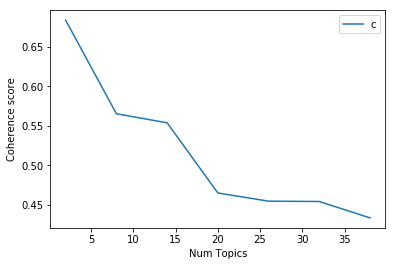

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 5 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [116]:
#Setting additional stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'databasejava', 'andcollaborate', 'toolsadditional', 'offhealthcare',
                               'includeproviding', 'workflowsmentor', 'forecastingvideo', 'areadatastax',
                               'learninghighly', 'data', 'science', 'big', 'spark', 'computer', 'software','engineering',
                               'research']))

In [117]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [118]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [119]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [120]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaai', 'aacareers', 'aacer', 'aachen', 'aacsb', 'aae', 'aaeo', 'aafa', 'aaha', 'aap', 'aarc', 'aarp', 'aasi', 'aav', 'aavalar', 'ab', 'abacus', 'abandoned', 'abap', 'abaqus', 'abb', 'abbeel', 'abbott', 'abbreviated', 'abbreviations', 'abbyy', 'abc', 'abd', 'abdominal', 'abductive', 'aberdeen', 'abet', 'abi', 'abide', 'abile', 'abilify', 'abilities', 'abilitiesa', 'abilitiescomputer', 'abilitiesdevelops', 'abilitiesexcellent', 'abilitiesfamiliarity', 'abilitiesmust', 'abilitiesoral', 'abilitiesstrong', 'abilitiesthe', 'ability', 'abilityexcellent', 'abilityskills', 'abinbev', 'abinitio', 'able', 'ableau', 'abled', 'abm', 'abnormal', 'abnormalities', 'abnormality', 'abobe', 'aboriginal', 'abound', 'aboveexperience', 'abovemust', 'abr', 'abrasive', 'abreast', 'abretminimum', 'abroad', 'abs', 'absence', 'absences', 'absense', 'absentee', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorption', 'abstract', 'abstracted', 'abstracting', 'abstraction', 'abstrac

In [122]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [123]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9931531531531531

Test set score: 0.6025917926565875
Done in 0.729072093963623 seconds


In [124]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9981981981981982

Test set score: 0.7116630669546437
Done in 2.8637919425964355 seconds


The test set performed reasonably well here, so we might want to consider this for tuning later.

### K Means

In [125]:
# Normalize the data.
X_norm = normalize(X_train)

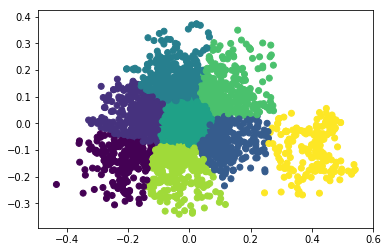

Done in 6.093481063842773 seconds


In [126]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [127]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [128]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9963963963963964

Test set score: 0.6241900647948164
Done in 0.000s


In [129]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8281081081081081

Test set score: 0.6803455723542117
Done in 0.9053230285644531 seconds


### LSA with BoW

In [130]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8281081081081081

Test set score: 0.6803455723542117
Done in 0.8385348320007324 seconds


In [131]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
experience
work
team
ability
skills
development
years
solutions
knowledge
information
 
Concept 1:
ability
information
others
understand
time
required
job
problem
service
equipment
 
Concept 2:
utilize
operate
residents
report
resident
care
procedures
equipment
maintain
supervisor
 
Concept 3:
team
product
work
world
customers
status
people
opportunity
products
ai
 
Concept 4:
product
customer
management
team
teams
sales
technical
customers
ability
marketing
 
Done in 38.0443639755249 seconds


### Bigrams

In [133]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1,2), max_df=1.0, min_df=1, max_features=None)
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

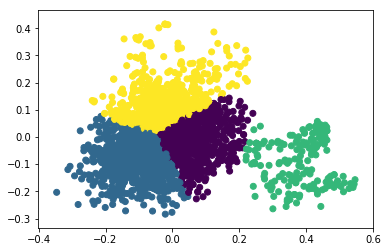

In [134]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [135]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [136]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

In [137]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

#y_pred = lr.predict(test_data_bow_bigram)

#conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

#cm = pd.DataFrame(conf, index = [i for i in labels],
                  #columns = [i for i in labels])
#plt.figure(figsize = (15,7))
#plt.title('Confusion Matrix for BoW with Bigrams')
#sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.9992792792792793

Test set score: 0.7365010799136069
Cross-Valid Bigram Fold Results are:  [0.73404255 0.77224199 0.75357143 0.77857143 0.79136691 0.75636364
 0.77454545 0.71636364 0.72       0.75182482]
Mean of Folds are =  0.7548891854482703
Done in %0.3fs 141.62924003601074


In [96]:
import time
start = time.time()

clf = XGBClassifier()  
clf.fit(train_data_bow_bigram,y_train)  
clf.predict(test_data_bow_bigram)
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9866666666666667

Test set score: 0.8995680345572354
Cross Validation Score: [0.91271552 0.92224622 0.90119435]
Cross Validation Mean: 0.9120520305022796
Done in 3742.8711552619934 seconds


In [95]:
print('kernel up')

kernel up


In [ ]:
import time
start = time.time()
progs = 0
alg = XGBClassifier(objective='binary:logistic')
progs += 1
print(progs)

clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                        'n_estimators': [50,100,200]}, 
                        verbose=1, 
                        scoring='neg_log_loss')

progs += 1
print(progs)
train = clf.fit(train_data_bow_bigram,y_train) #this is where the model took the most time
progs += 1
print(progs)
bigram_pred = clf.predict(test_data_bow_bigram.toarray())
progs += 1
print(progs)
birgram_pred_prob = clf.predict_proba(test_data_bow_bigram.toarray())
progs +=1
print(progs)
clf.fit(train[features], train["QuoteConversion_Flag"])
progs +=1
print(progs)
#trust your CV!
print('Raw AUC score:', score)
print('Training set score:', clf.score(train_data_bow_bigram.toarray(), y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram.toarray(), y_test_clean))
end = time.time()
print("Done in", end - start, "seconds")

1
2
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
#from tqdm import tqdm

#for i in tqdm(range(10)):
    #time.sleep(3)

    #alg = XGBClassifier(objective='binary:logistic')

    #clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                        #'n_estimators': [50,100,200]}, 
                        #verbose=1, 
                        #scoring='neg_log_loss')

    #clf.fit(train_data_bow_bigram,y_train)  
    #clf.predict(test_data_bow_bigram)
    #print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
    #print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
    #cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
    #print('Cross Validation Score:', cross_val)
    #print('Cross Validation Mean:', cross_val.mean())

## TF-IDF Analysis

### Train and Test Sets


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

In [ ]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [ ]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

In [ ]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least 2x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter tweets get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
start = time.time()
X = X1
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 10
labels = y
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

In [ ]:
df['MiniBatchLabels'] = mini_labels

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df[df.MiniBatchLabels == label].groupby('Org').count())
    print('')

In [ ]:
#Let's check Cluster 0 - the largest, and likely a catch-all for tweets that did not fall into other clusters
shuffle(df[df.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df[df.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df[df.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets our solution considers similar, for the first five identified topics
tweets_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = handles)

df_cm = pd.DataFrame(conf, index = [i for i in handles],
                  columns = [i for i in handles])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))